In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Ranadeb Mallick/Downloads/Travel.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:
# df = df.drop('CustomerID', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
# decision for the null values :
#     age                         : use-> mean() value
#     Type of Contact             : use -> Self Enquiry
#     Duration Of Pitch           : use -> min() value
#     Number Of Followups         : use -> min() value
#     Preferred Property Star     : use -> min() value
#     Number Of Trips             : use -> min() value
#     Number Of Children Visiting : use -> 0

In [7]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [8]:
df[df.duplicated()] #There is no duplicate values

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


In [9]:
df.duplicated().sum()

0

In [10]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [11]:
df['ProdTaken'].value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

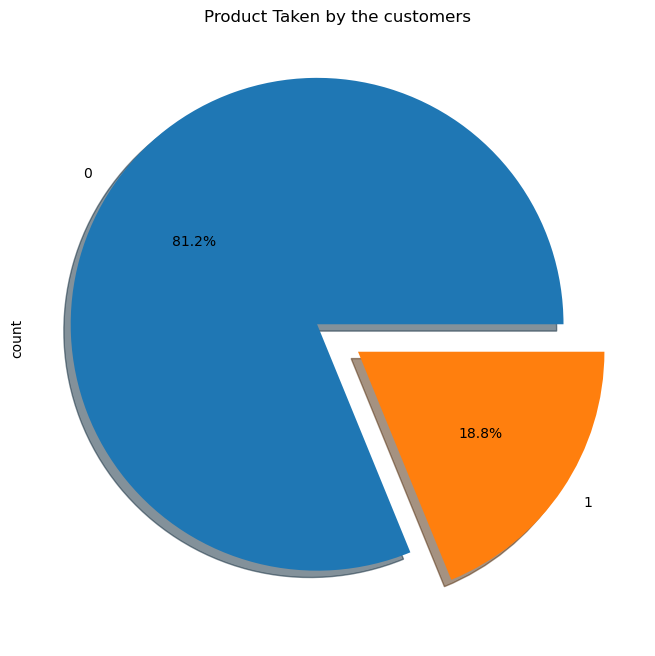

In [12]:
df['ProdTaken'].value_counts().plot.pie(x = df['Occupation'], autopct = '%1.1f%%', figsize = (8,8), explode=[0.1,0.1],
                                        shadow=True)
plt.title("Product Taken by the customers")
plt.show()

In [13]:
df['Occupation'].value_counts()


Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

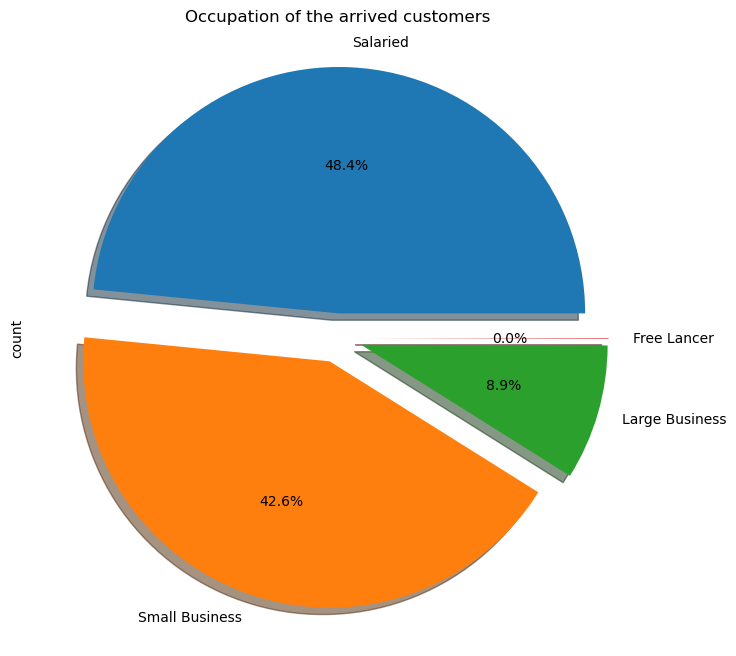

In [14]:
df['Occupation'].value_counts().plot.pie(x = df['Occupation'], autopct = '%1.1f%%', figsize = (8,8), explode=[0.1,0.1,0.1,0.1],
                                        shadow=True)
plt.title("Occupation of the arrived customers")
plt.show()

In [15]:
np.sort(df['Age'].unique()) # people present from age 18 to 61, and there are some(226) null values also

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., nan])

In [16]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [17]:
# Replacing the "Fe Male" typo into "Female"

df['Gender'] = df['Gender'].str.replace("Fe Male", "Female")

In [18]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [19]:
1817+155

1972

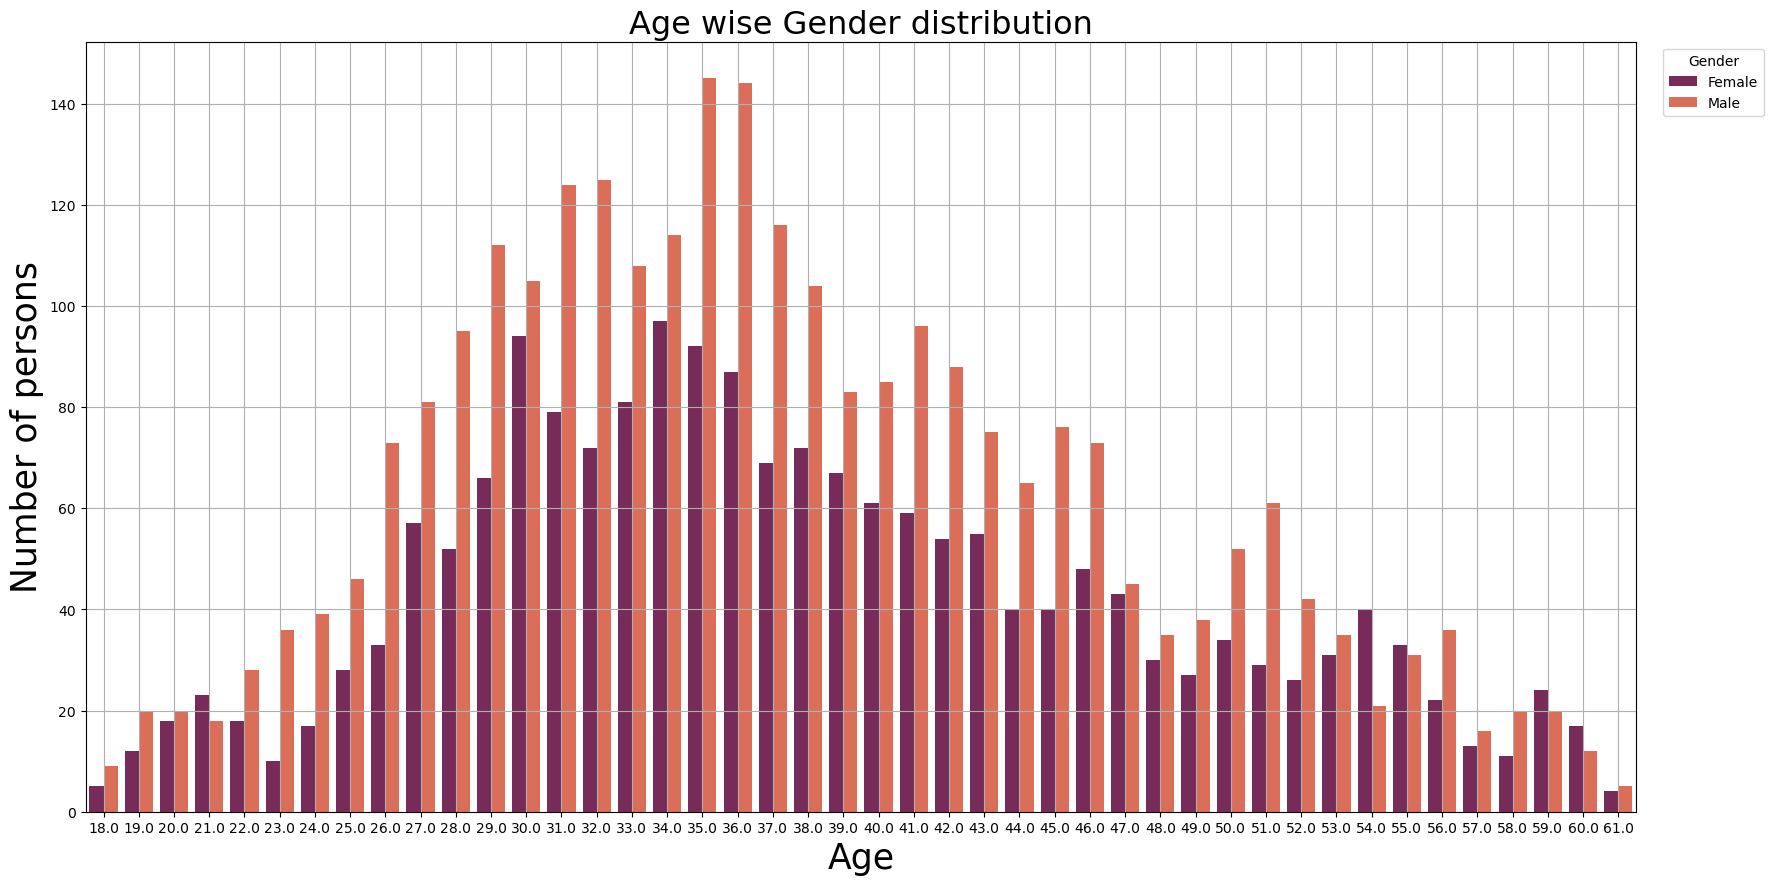

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Age'], hue='Gender', data=df, palette = "rocket")
plt.title('Age wise Gender distribution', fontsize=23)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

In [21]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

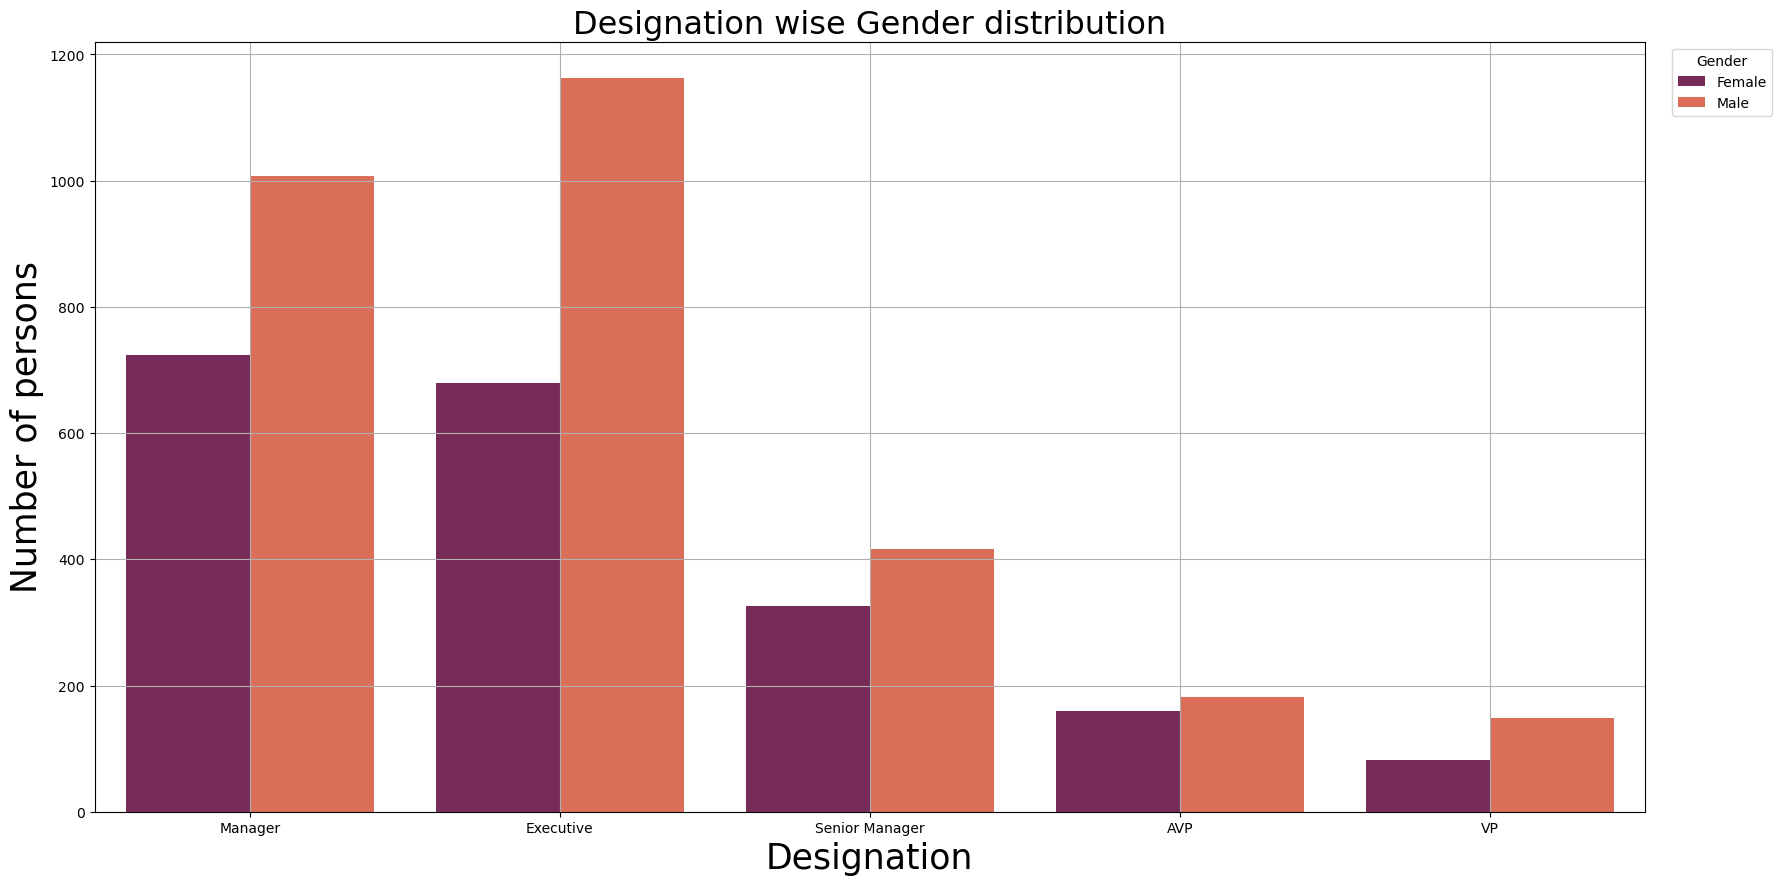

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Designation'], hue='Gender', data=df, palette = "rocket")
plt.title('Designation wise Gender distribution', fontsize=23)
plt.xlabel('Designation', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

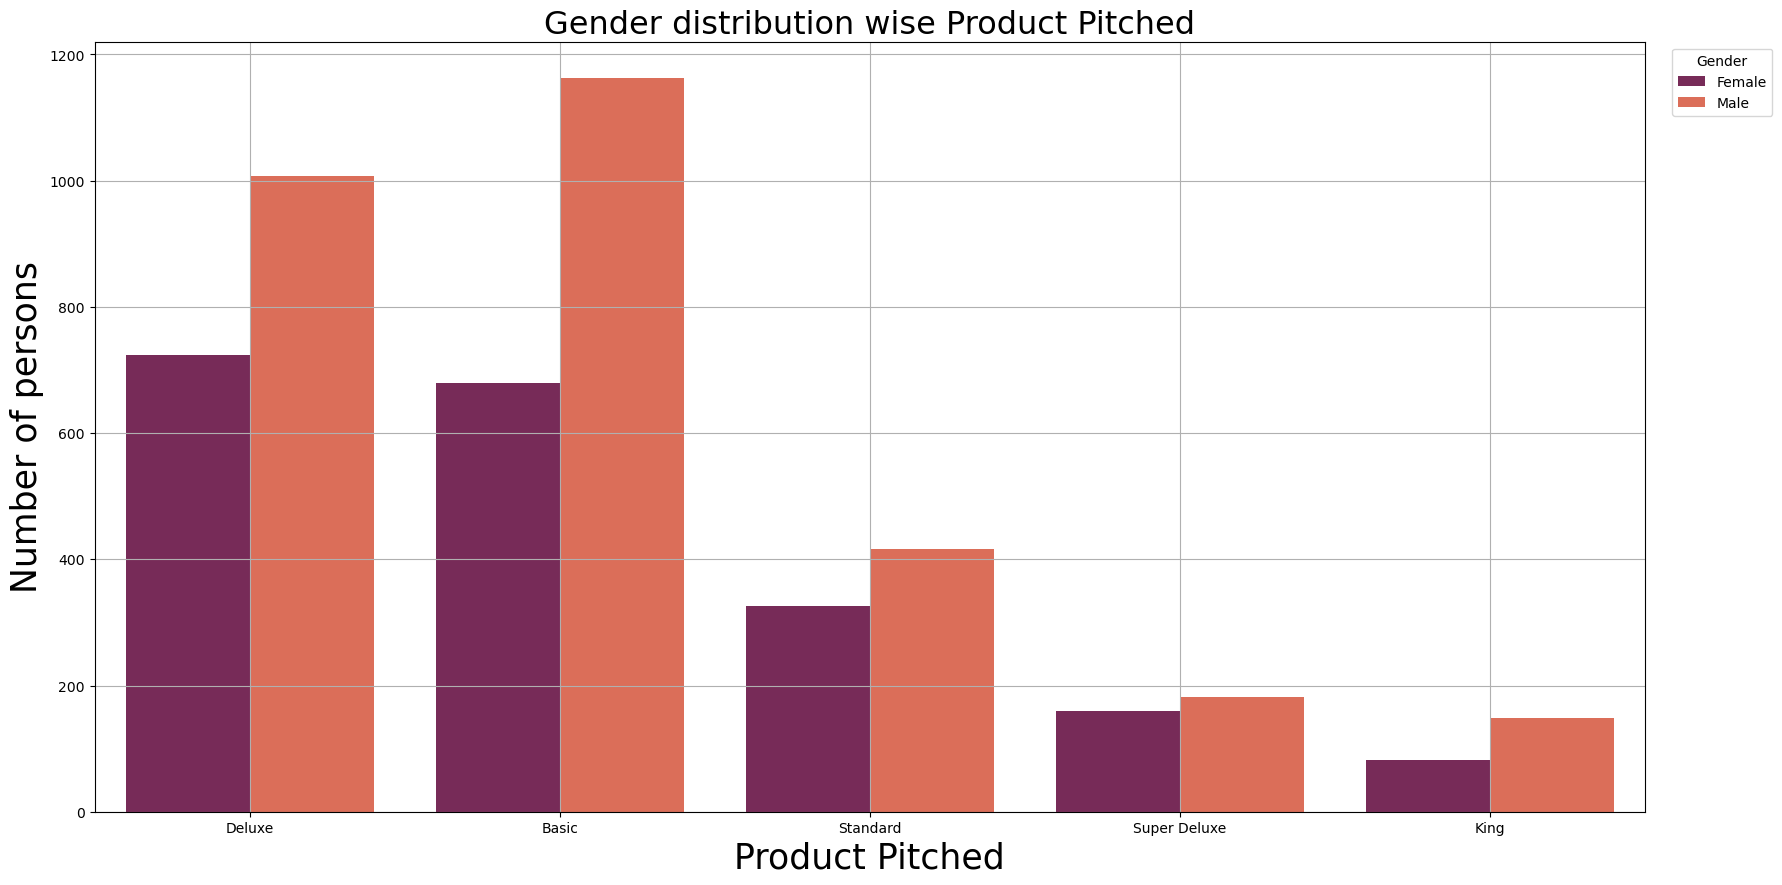

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['ProductPitched'], hue='Gender', data=df, palette = "rocket")
plt.title('Gender distribution wise Product Pitched', fontsize=23)
plt.xlabel('Product Pitched', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

Insights: For VP booked room is King, for AVP booked room is Super Deluxe, for Senior Manager booked room is Standard, 
          for Executive booked room is Basic and for Manager booked room is Deluxe 

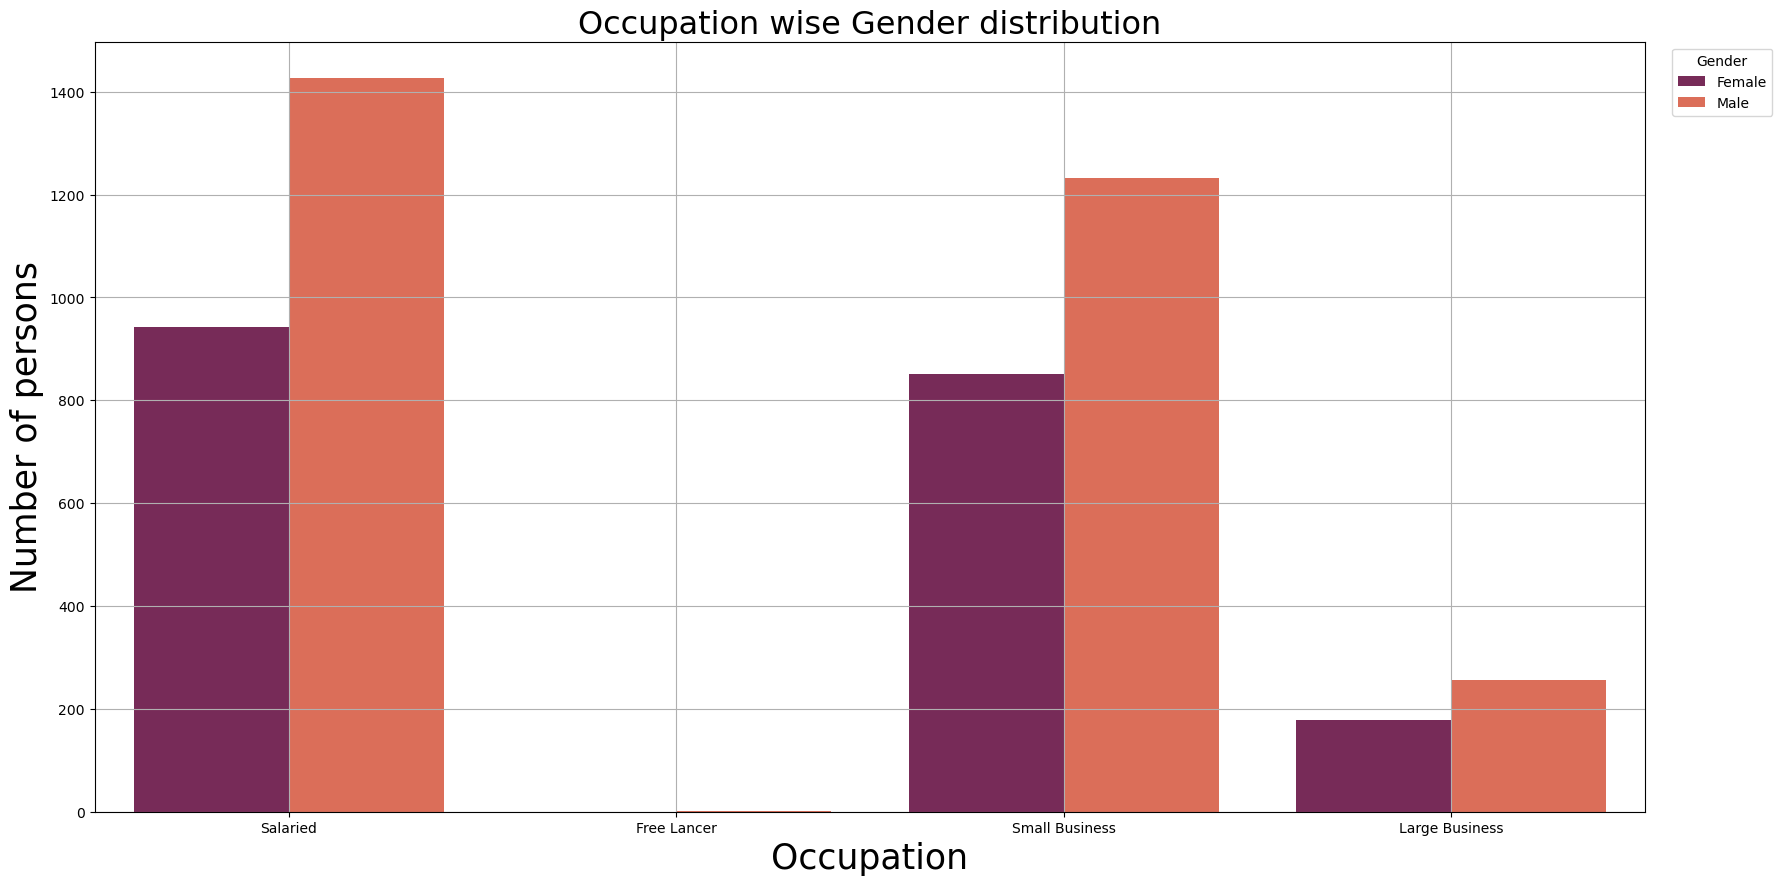

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Occupation'], hue='Gender', data=df, palette = "rocket")
plt.title('Occupation wise Gender distribution', fontsize=23)
plt.xlabel('Occupation', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

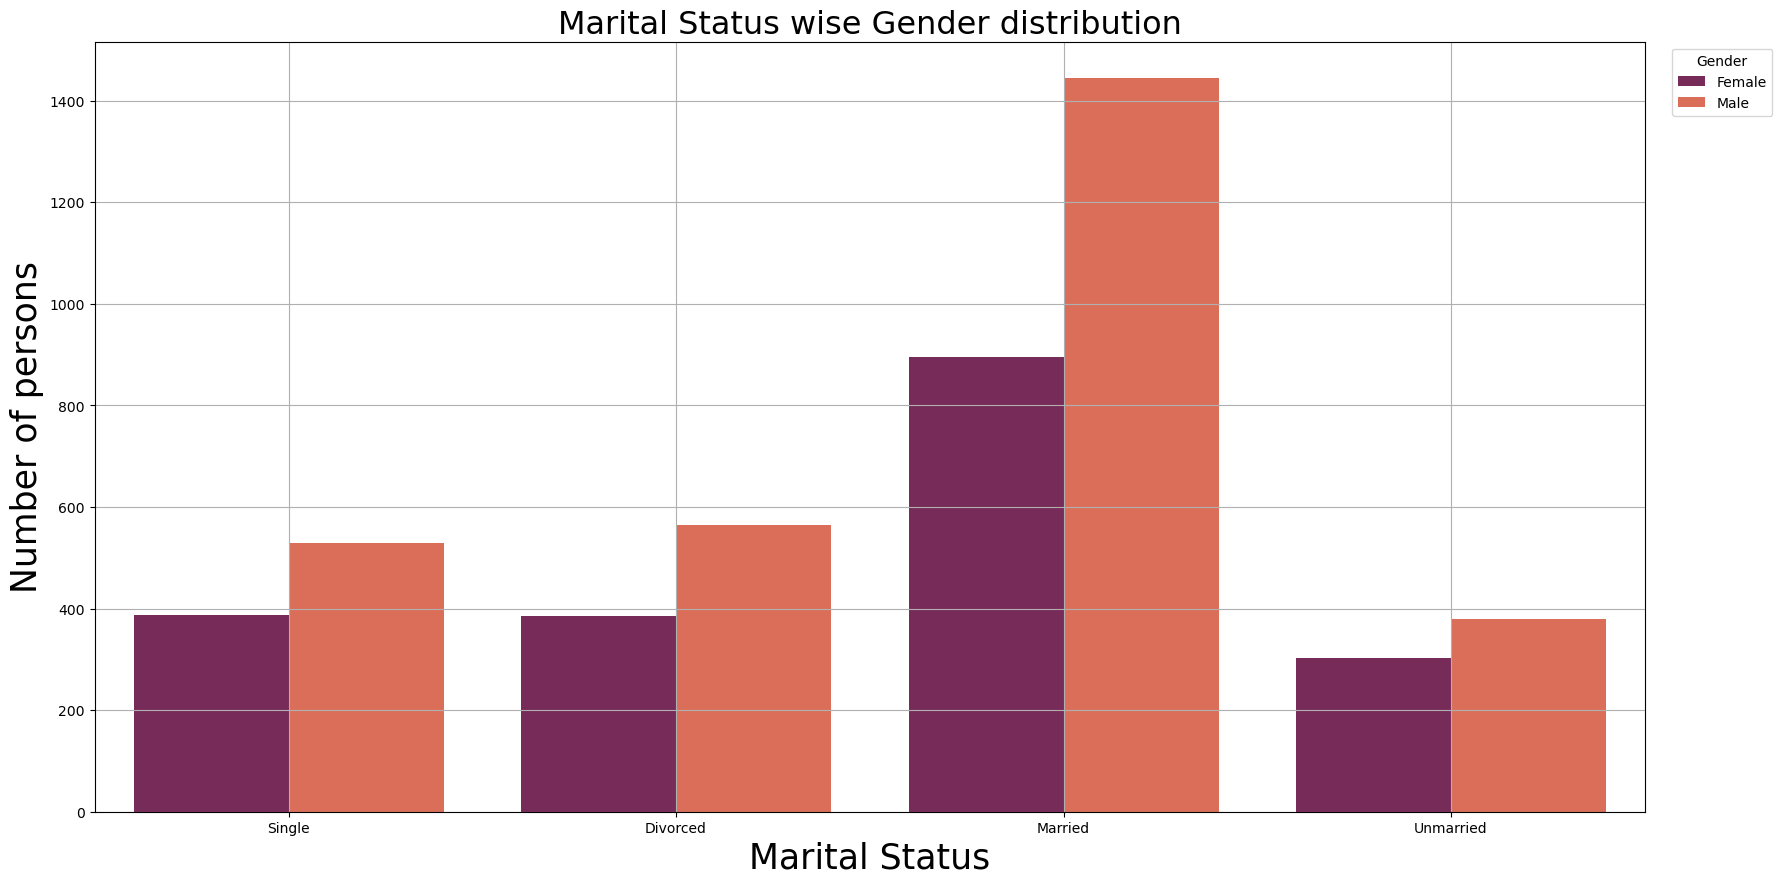

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['MaritalStatus'], hue='Gender', data=df, palette = "rocket")
plt.title('Marital Status wise Gender distribution', fontsize=23)
plt.xlabel('Marital Status', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

In [26]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [27]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

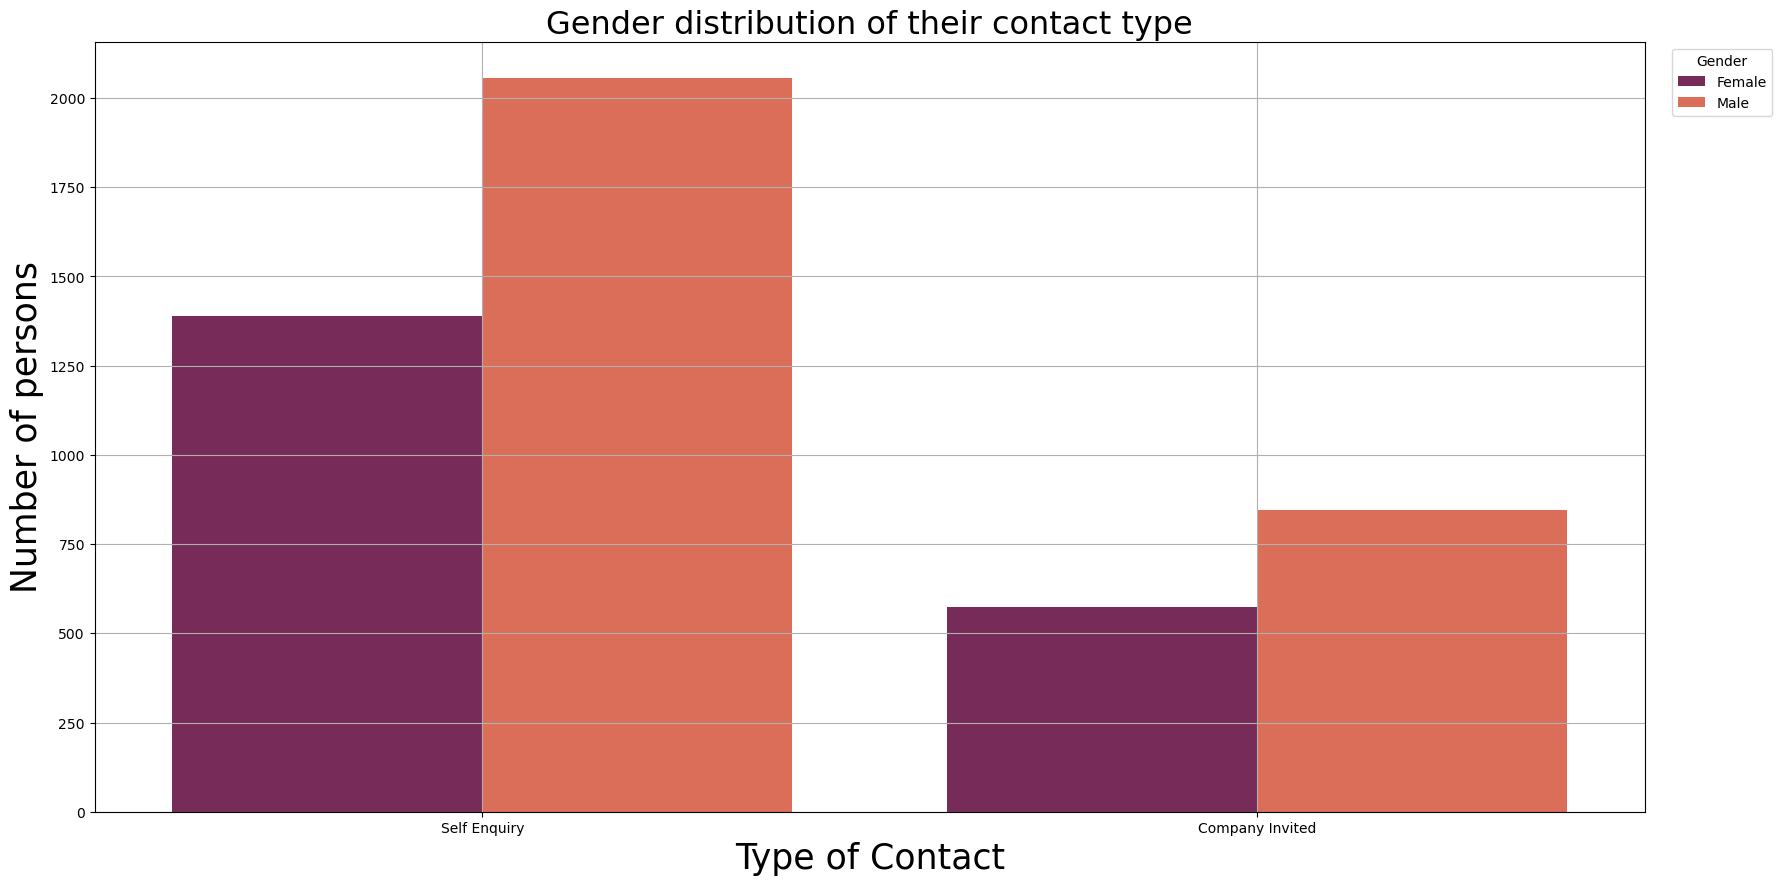

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['TypeofContact'], hue='Gender', data=df, palette = "rocket")
plt.title('Gender distribution of their contact type', fontsize=23)
plt.xlabel('Type of Contact', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

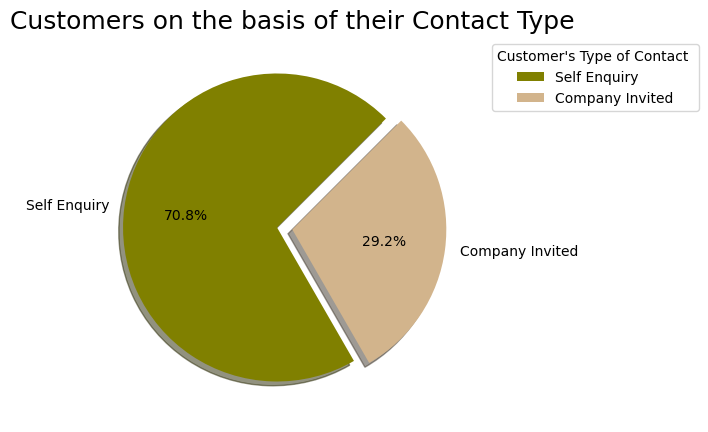

In [29]:
plt.figure(figsize=(10,5))
area = df['TypeofContact'].value_counts().index
no_of_people = df['TypeofContact'].value_counts().values
plt.pie(no_of_people, labels=area, explode=[0.1,0], colors=['olive','tan'], autopct='%0.1f%%', shadow=True, 
        startangle=45) 
plt.title('Customers on the basis of their Contact Type', fontsize=18)
plt.legend(title="Customer's Type of Contact ", labels=['Self Enquiry', 'Company Invited'], loc='upper left', 
           bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

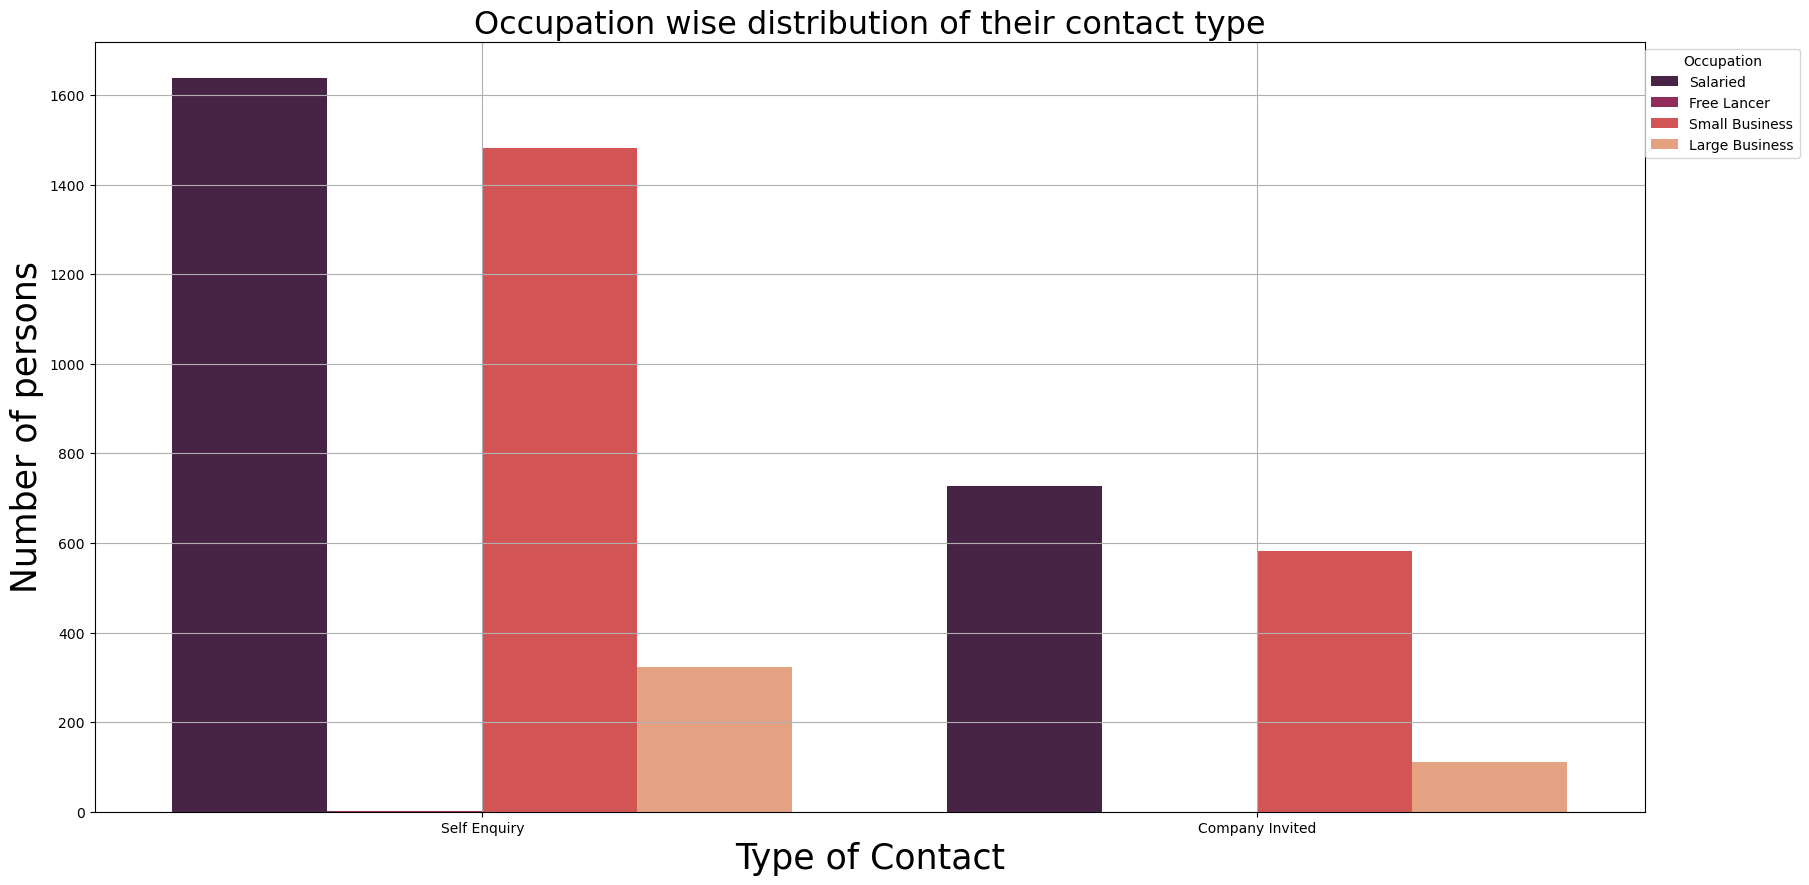

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['TypeofContact'], hue='Occupation', data=df, palette = "rocket")
plt.title('Occupation wise distribution of their contact type', fontsize=23)
plt.xlabel('Type of Contact', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Occupation', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

In [31]:
df['Passport'].value_counts()

Passport
0    3466
1    1422
Name: count, dtype: int64

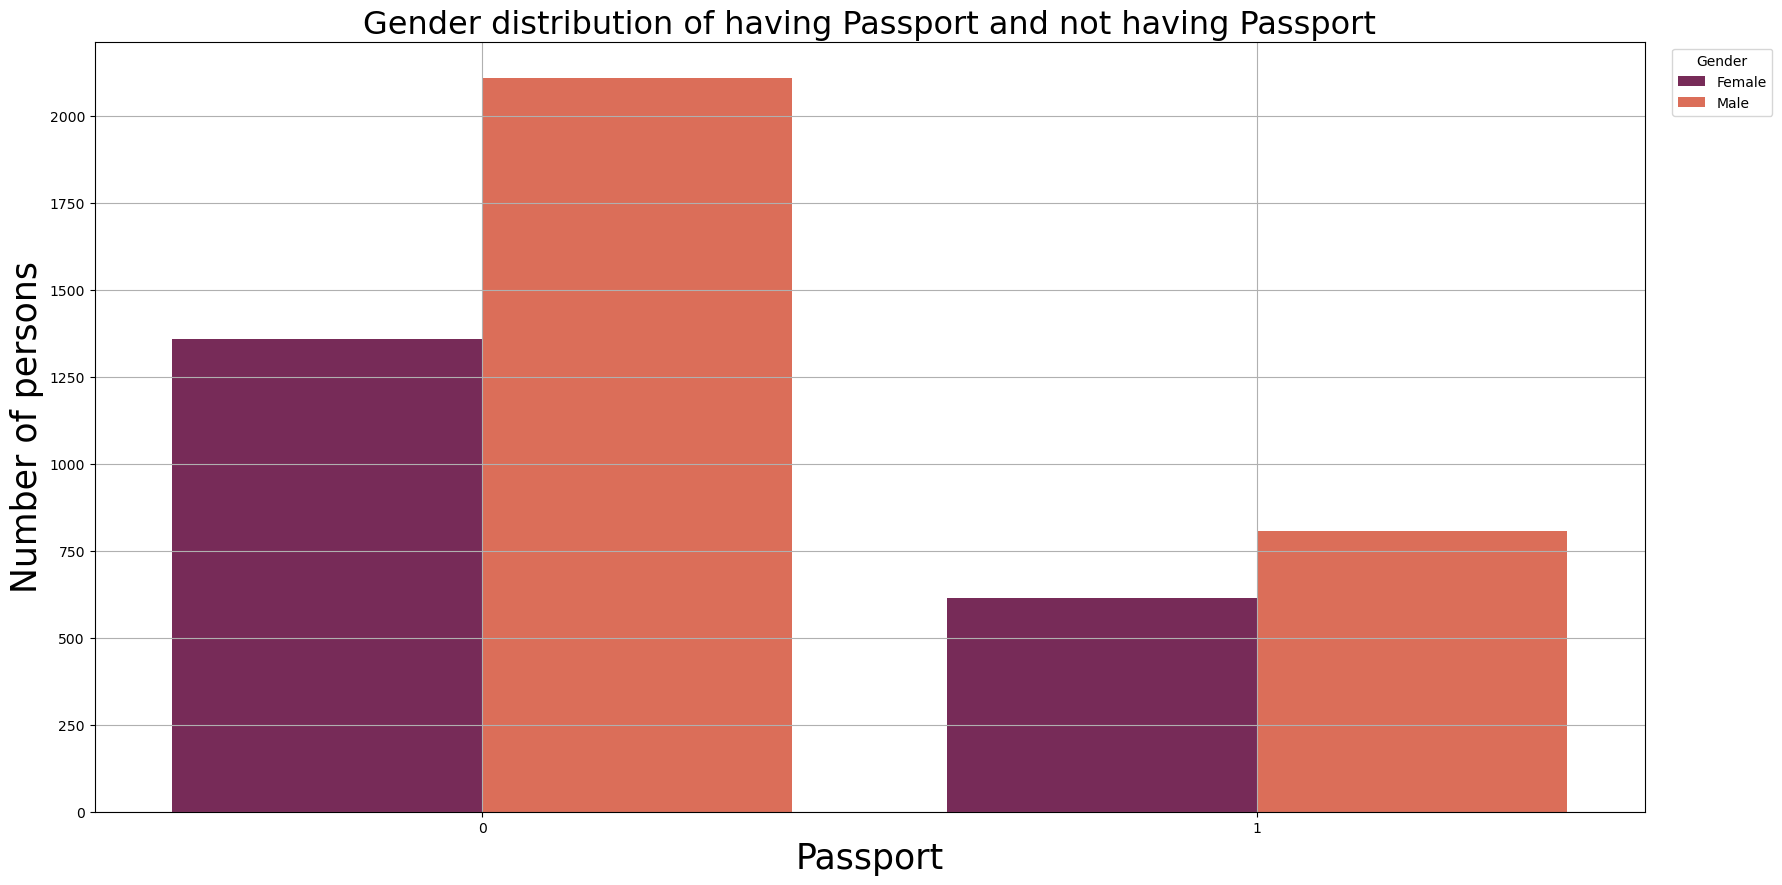

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Passport'], hue='Gender', data=df, palette = "rocket")
plt.title('Gender distribution of having Passport and not having Passport', fontsize=23)
plt.xlabel('Passport', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

In [33]:
df['OwnCar'].value_counts()

OwnCar
1    3032
0    1856
Name: count, dtype: int64

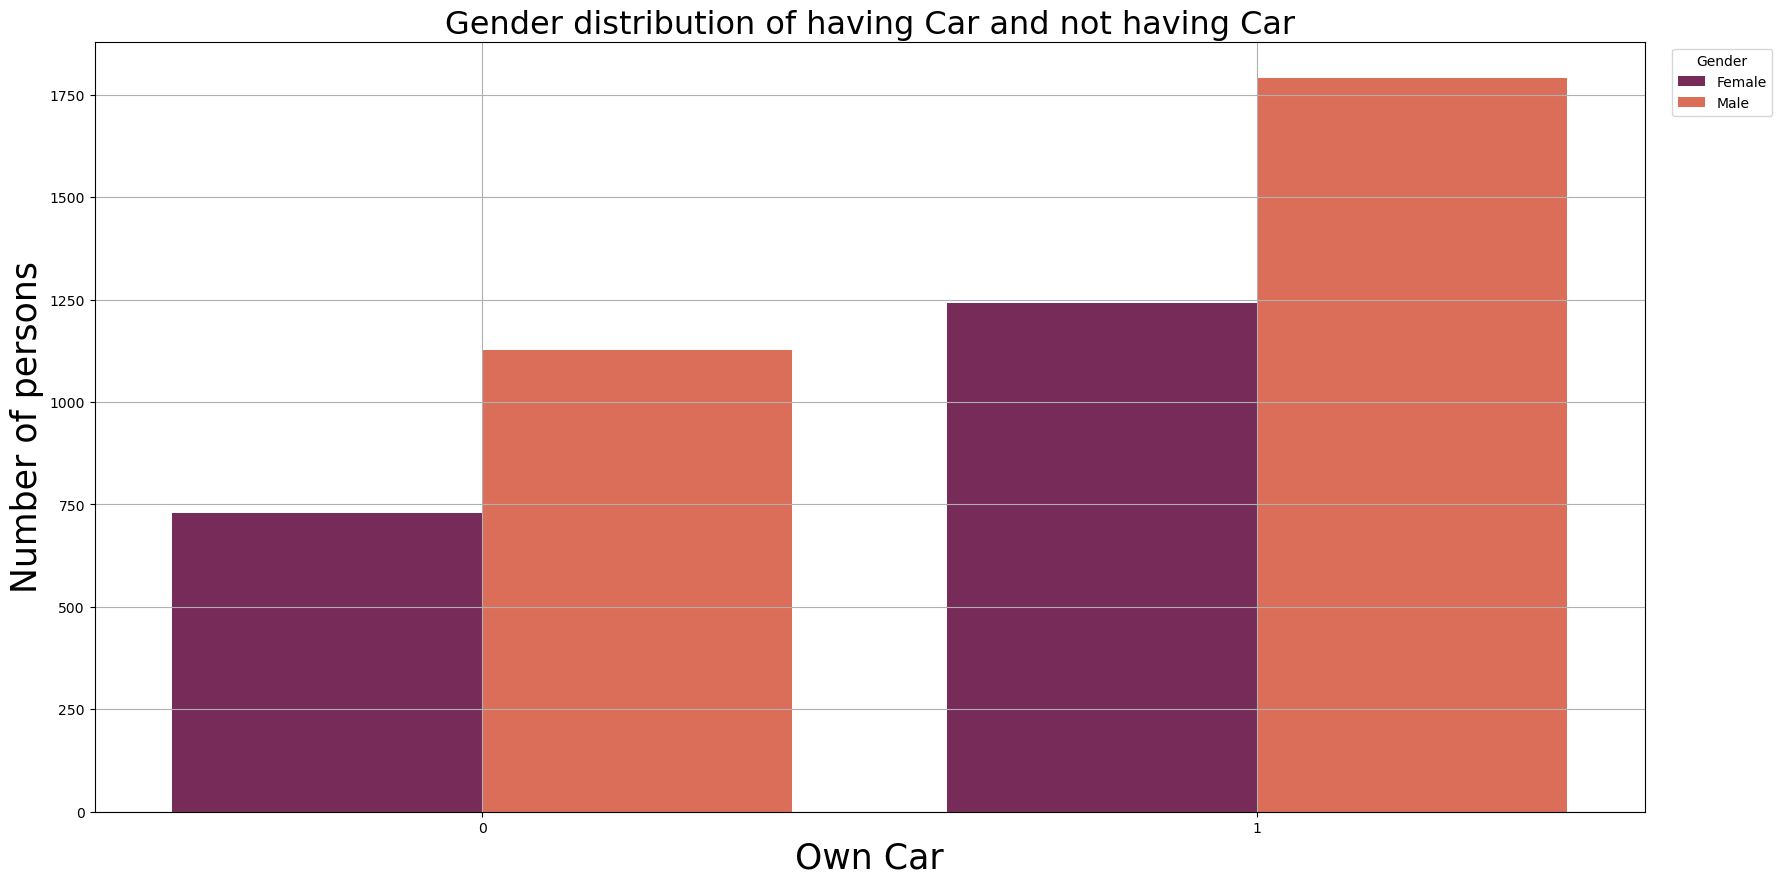

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['OwnCar'], hue='Gender', data=df, palette = "rocket")
plt.title('Gender distribution of having Car and not having Car', fontsize=23)
plt.xlabel('Own Car', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

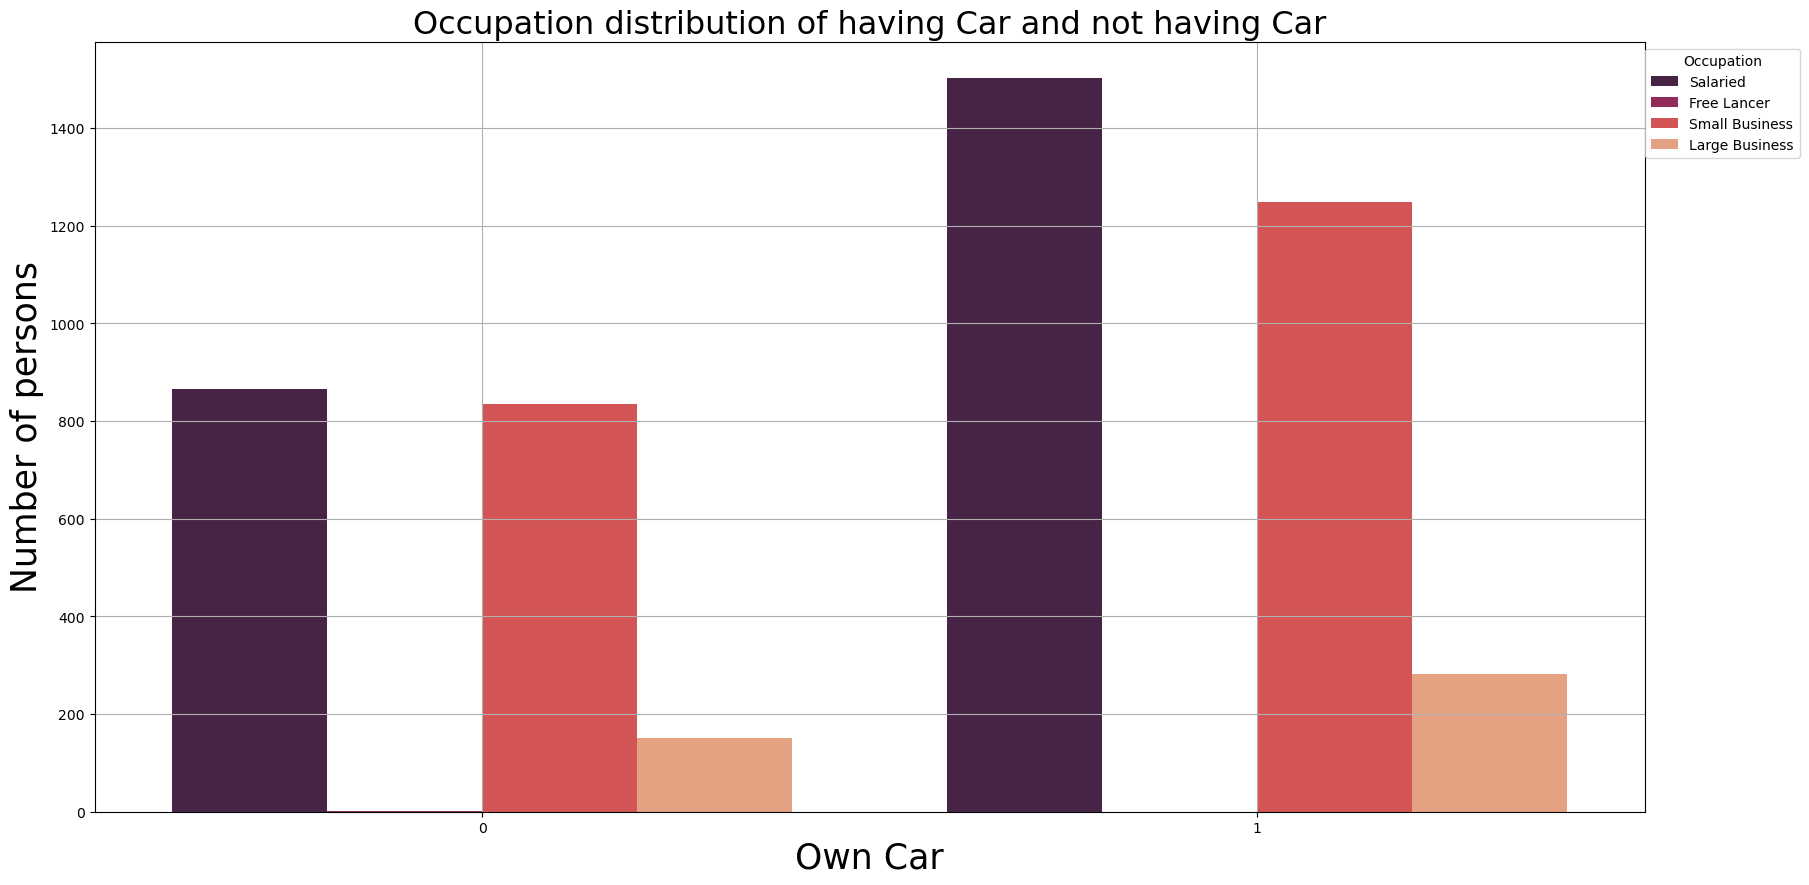

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['OwnCar'], hue='Occupation', data=df, palette = "rocket")
plt.title('Occupation distribution of having Car and not having Car', fontsize=23)
plt.xlabel('Own Car', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Occupation', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

In [36]:
df['NumberOfChildrenVisiting'].value_counts()

NumberOfChildrenVisiting
1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: count, dtype: int64

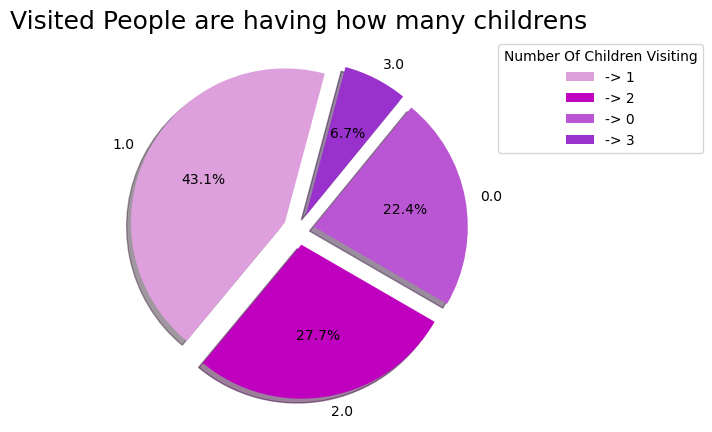

In [37]:
plt.figure(figsize=(10,5))
city_tier = df['NumberOfChildrenVisiting'].value_counts().index
no_of_people = df['NumberOfChildrenVisiting'].value_counts().values
plt.pie(no_of_people, labels=city_tier, explode=[0.1,0.1,0.1,0.1], colors=['plum','m', 'mediumorchid','darkorchid'], 
        autopct='%1.1f%%', shadow=True, startangle=75) 
plt.title('Visited People are having how many childrens', fontsize=18)
plt.legend(title="Number Of Children Visiting", labels=['-> 1', '-> 2','-> 0','-> 3'], loc='upper left', 
           bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

In [38]:
df['CityTier'].value_counts().index

Index([1, 3, 2], dtype='int64', name='CityTier')

In [39]:
df['CityTier'].value_counts().values

array([3190, 1500,  198], dtype=int64)

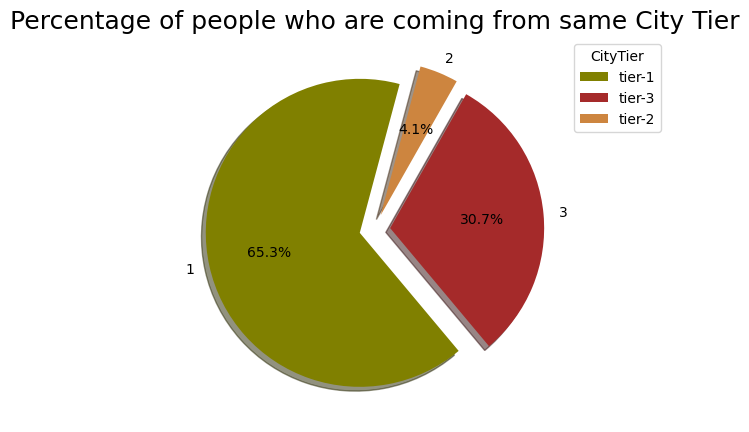

In [40]:
plt.figure(figsize=(10,5))
city_tier = df['CityTier'].value_counts().index
no_of_people = df['CityTier'].value_counts().values
plt.pie(no_of_people, labels=city_tier, explode=[0.1,0.1,0.1], colors=['olive','brown','peru'], autopct='%1.1f%%', 
        shadow=True, startangle=75) 
plt.title('Percentage of people who are coming from same City Tier', fontsize=18)
plt.legend(title="CityTier", labels=['tier-1', 'tier-3','tier-2'], loc='upper left', bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

In [41]:
df['CityTier'].value_counts()

CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

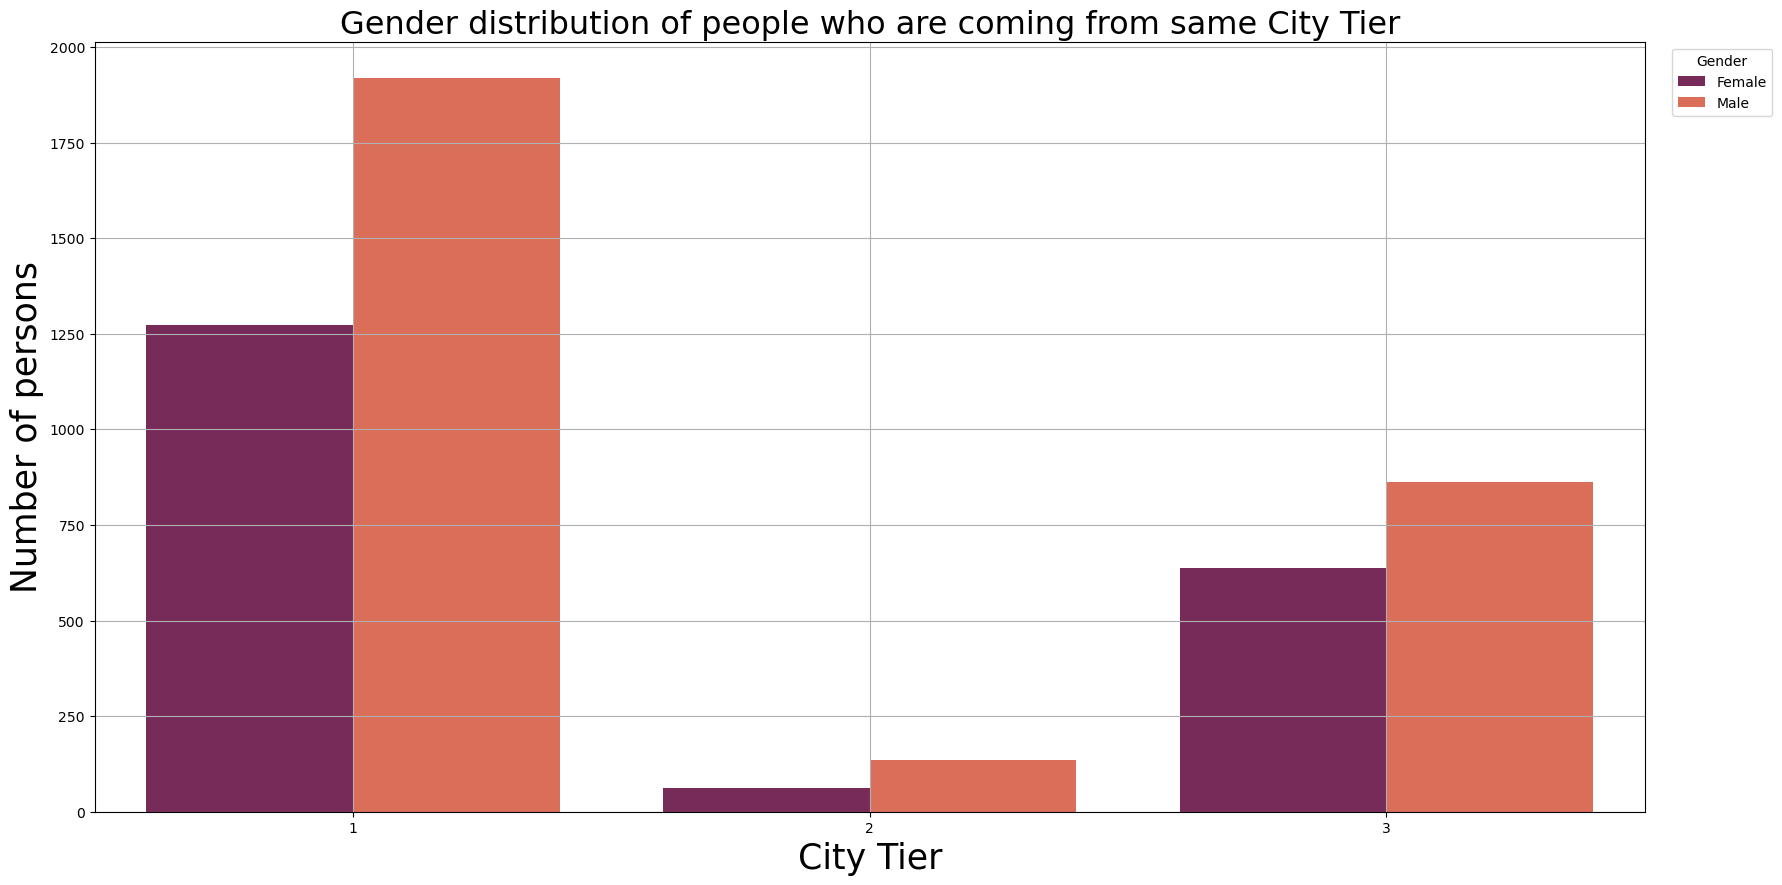

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['CityTier'], hue='Gender', data=df, palette = "rocket")
plt.title('Gender distribution of people who are coming from same City Tier', fontsize=23)
plt.xlabel('City Tier', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

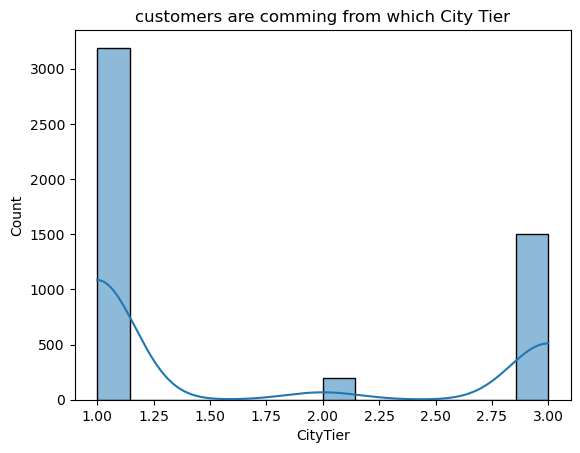

In [43]:
sns.histplot(df['CityTier'], kde=True)
plt.title('customers are comming from which City Tier')
plt.show()

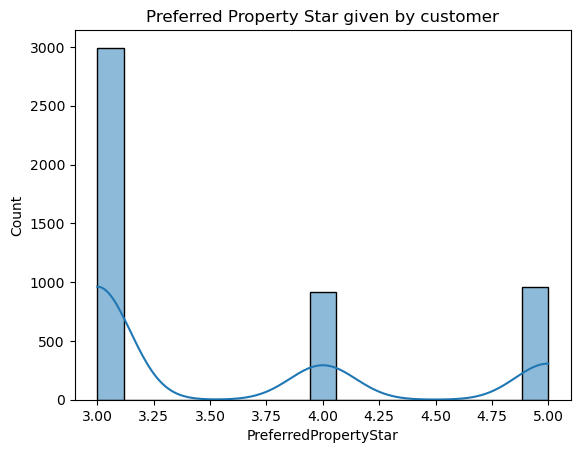

In [44]:
sns.histplot(df['PreferredPropertyStar'], kde=True)
plt.title('Preferred Property Star given by customer')
plt.show()

In [45]:
df['PreferredPropertyStar'].value_counts().index

Index([3.0, 5.0, 4.0], dtype='float64', name='PreferredPropertyStar')

In [46]:
df['PreferredPropertyStar'].value_counts().values

array([2993,  956,  913], dtype=int64)

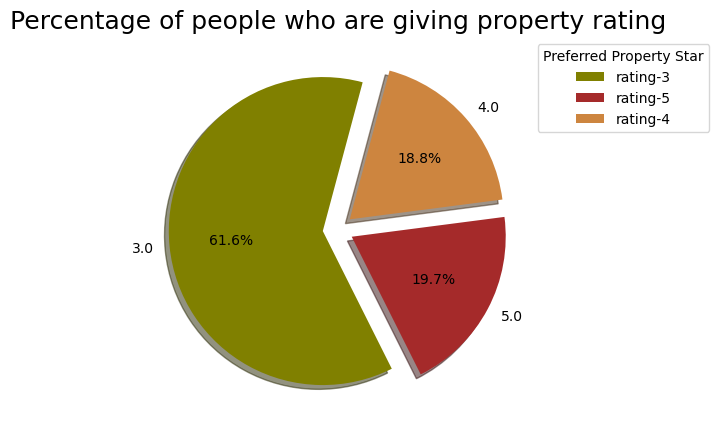

In [47]:
plt.figure(figsize=(10,5))
rating = df['PreferredPropertyStar'].value_counts().index
no_of_people = df['PreferredPropertyStar'].value_counts().values
plt.pie(no_of_people, labels=rating, explode=[0.1,0.1,0.1], colors=['olive','brown','peru'], autopct='%1.1f%%', 
        shadow=True, startangle=75) 
plt.title('Percentage of people who are giving property rating', fontsize=18)
plt.legend(title="Preferred Property Star", labels=['rating-3', 'rating-5','rating-4'], loc='upper left', 
           bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

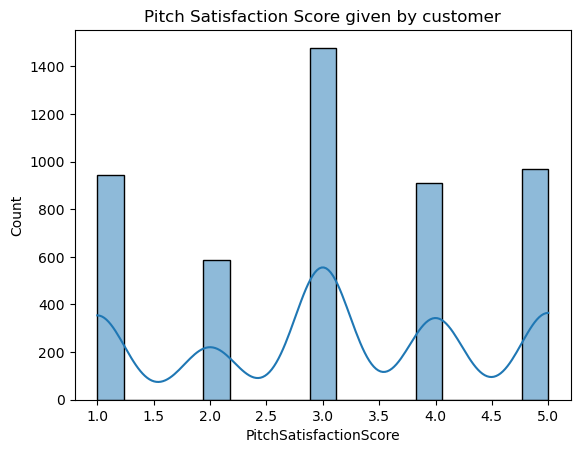

In [48]:
sns.histplot(df['PitchSatisfactionScore'], kde=True)
plt.title('Pitch Satisfaction Score given by customer')
plt.show()

In [49]:
df['PitchSatisfactionScore'].value_counts().index

Index([3, 5, 1, 4, 2], dtype='int64', name='PitchSatisfactionScore')

In [50]:
np.sort(df['PitchSatisfactionScore'].value_counts().values)

array([ 586,  912,  942,  970, 1478], dtype=int64)

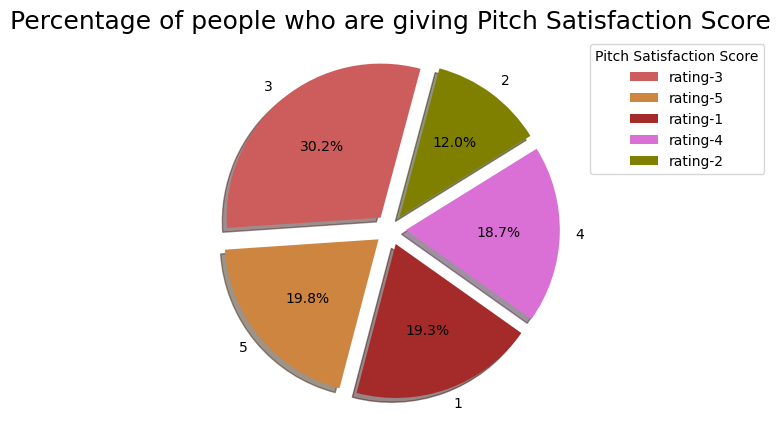

In [51]:
plt.figure(figsize=(10,5))
score = df['PitchSatisfactionScore'].value_counts().index
no_of_people = df['PitchSatisfactionScore'].value_counts().values
plt.pie(no_of_people, labels=score, explode=[0.1,0.1,0.1,0.1,0.1], colors=['indianred', 'peru','brown','orchid','olive'], 
        autopct='%1.1f%%', shadow=True, startangle=75) 
plt.title('Percentage of people who are giving Pitch Satisfaction Score', fontsize=18)
plt.legend(title="Pitch Satisfaction Score", labels=['rating-3', 'rating-5','rating-1','rating-4','rating-2'], 
           loc='upper left', bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

In [52]:
df['PitchSatisfactionScore'].value_counts(normalize=True)

PitchSatisfactionScore
3    0.302373
5    0.198445
1    0.192717
4    0.186579
2    0.119885
Name: proportion, dtype: float64

In [53]:
df['DurationOfPitch'].value_counts()

DurationOfPitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25.0      73
21.0      73
27.0      72
26.0      72
24.0      70
35.0      66
20.0      65
28.0      61
33.0      57
19.0      57
34.0      50
36.0      44
5.0        6
126.0      1
127.0      1
Name: count, dtype: int64

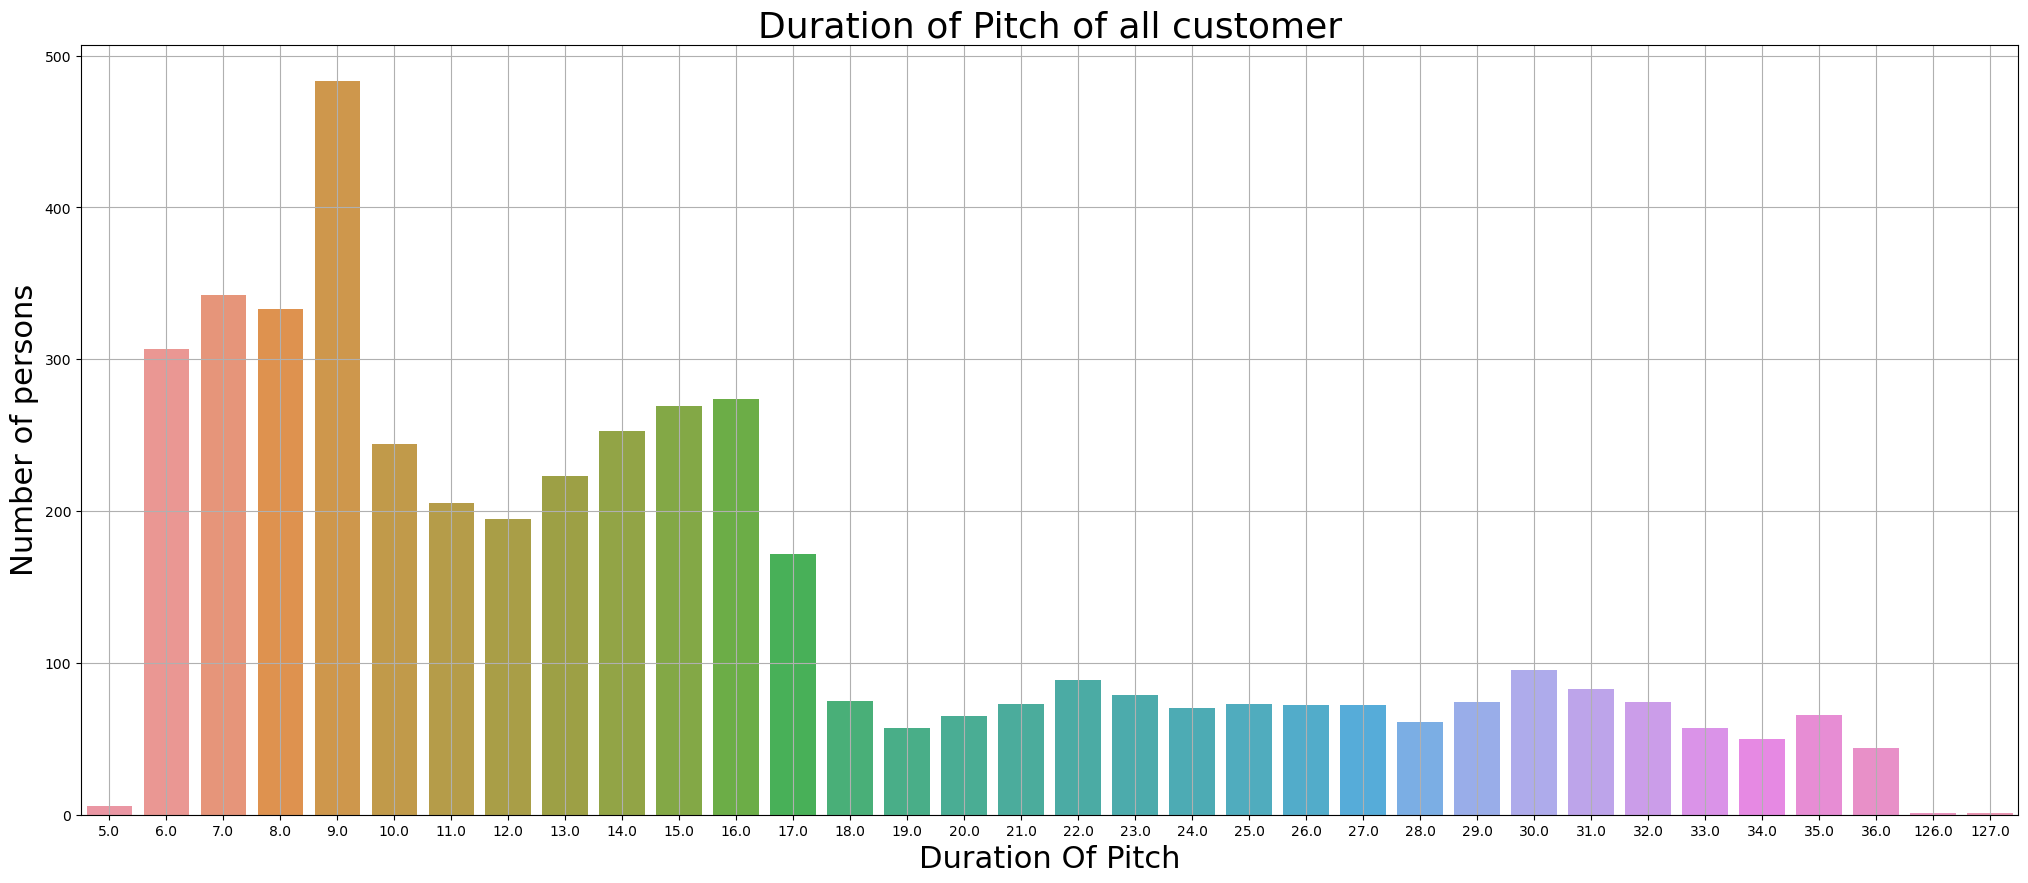

In [54]:
plt.figure(figsize=(25,10))
sns.barplot(x=df['DurationOfPitch'].value_counts().index, 
            y=df['DurationOfPitch'].value_counts().values)
plt.title('Duration of Pitch of all customer', fontsize=26)
plt.xlabel('Duration Of Pitch', fontsize=22)
plt.ylabel('Number of persons', fontsize=22)
plt.grid()
plt.show()

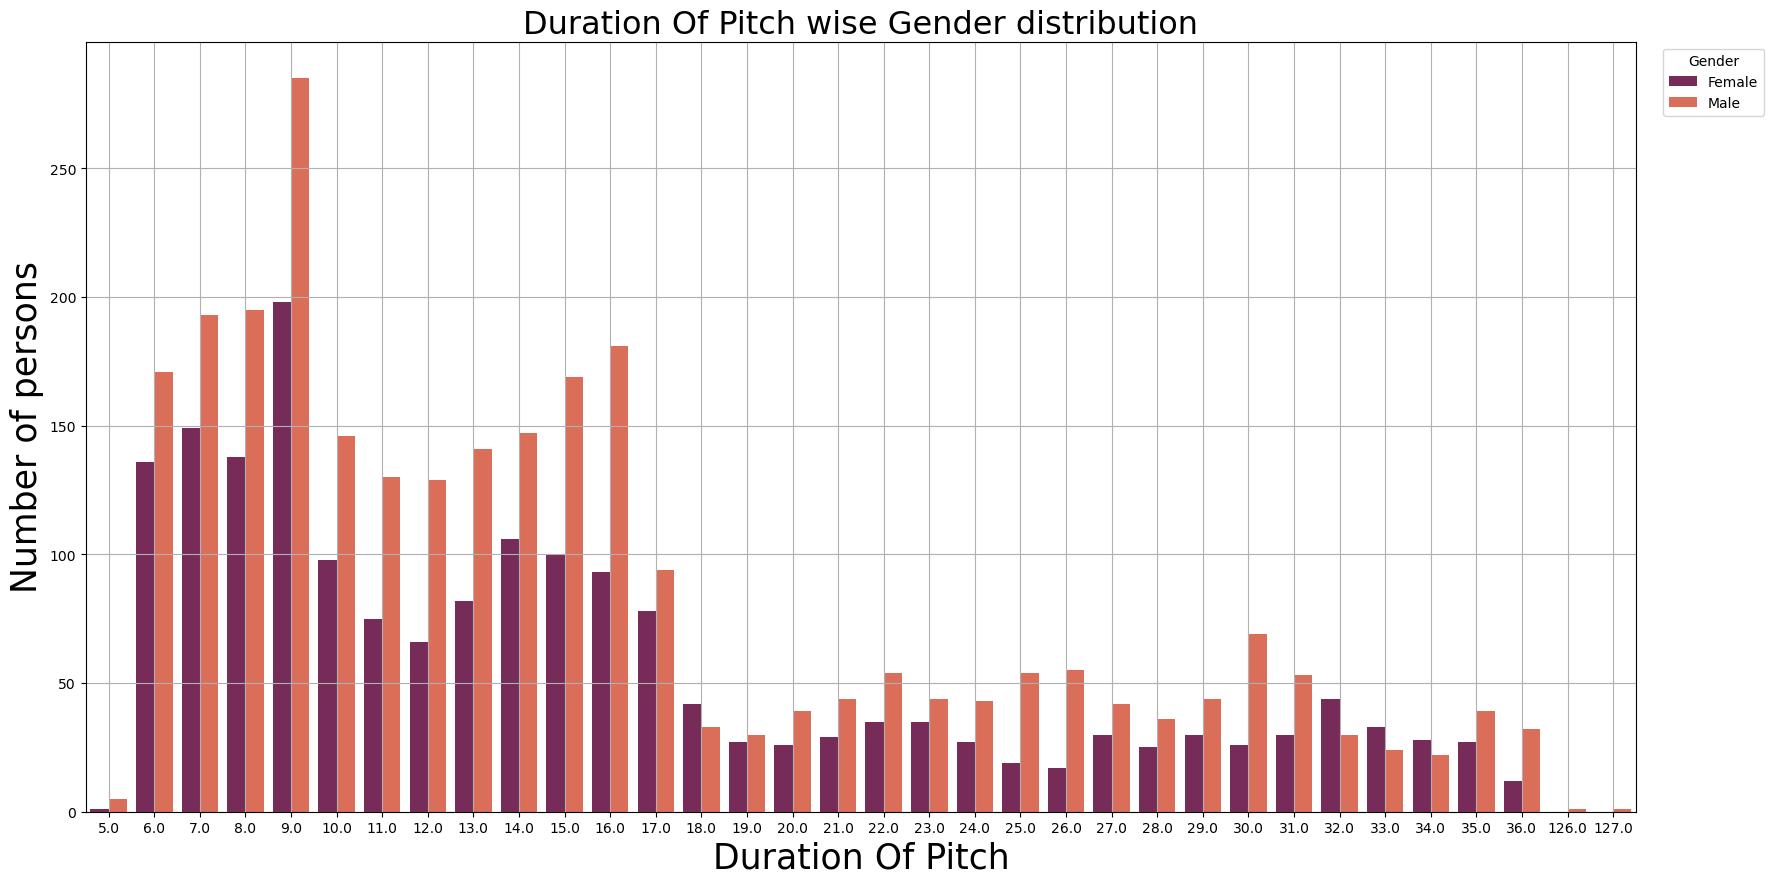

In [55]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['DurationOfPitch'], hue='Gender', data=df, palette = "rocket")
plt.title('Duration Of Pitch wise Gender distribution', fontsize=23)
plt.xlabel('Duration Of Pitch', fontsize=25)
plt.ylabel('Number of persons', fontsize=25)
plt.grid()
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(1, 0, 0.1, 1))
plt.show()

In [56]:
df['DurationOfPitch'].value_counts(normalize=True)

DurationOfPitch
9.0      0.104162
7.0      0.073755
8.0      0.071814
6.0      0.066207
16.0     0.059090
15.0     0.058012
14.0     0.054561
10.0     0.052620
13.0     0.048091
11.0     0.044210
12.0     0.042053
17.0     0.037093
30.0     0.020487
22.0     0.019193
31.0     0.017900
23.0     0.017037
18.0     0.016174
29.0     0.015959
32.0     0.015959
25.0     0.015743
21.0     0.015743
27.0     0.015527
26.0     0.015527
24.0     0.015096
35.0     0.014233
20.0     0.014018
28.0     0.013155
33.0     0.012292
19.0     0.012292
34.0     0.010783
36.0     0.009489
5.0      0.001294
126.0    0.000216
127.0    0.000216
Name: proportion, dtype: float64

# Free Lancer

In [57]:
# There are only 2 "Free Lancer" and both are "Male"

df[df['Occupation'] == 'Free Lancer']

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
2446,202446,1,38.0,Self Enquiry,1,9.0,Free Lancer,Male,4,5.0,Basic,3.0,Single,8.0,1,3,0,1.0,Executive,20768.0


In [58]:
# using groupby

df_income = df.groupby(['Occupation', 'MonthlyIncome', 'Gender'])['Age'].sum().sort_values(ascending=True).reset_index()
df_income

,Occupation,MonthlyIncome,Gender,Age
0,Salaried,18681.0,Male,0.0
1,Large Business,18441.0,Male,0.0
2,Large Business,18420.0,Male,0.0
3,Large Business,18376.0,Female,0.0
4,Salaried,18485.0,Male,0.0
...,...,...,...,...
2814,Small Business,23619.0,Male,180.0
2815,Salaried,21804.0,Male,184.0
2816,Salaried,25482.0,Male,188.0
2817,Salaried,17380.0,Male,216.0


In [59]:
df_income[df_income['Occupation'] == 'Small Business']

,Occupation,MonthlyIncome,Gender,Age
5,Small Business,18544.0,Male,0.0
9,Small Business,18690.0,Male,0.0
15,Small Business,18388.0,Male,0.0
17,Small Business,18708.0,Male,0.0
34,Small Business,18673.0,Female,0.0
...,...,...,...,...
2808,Small Business,20605.0,Female,156.0
2809,Small Business,20936.0,Male,160.0
2810,Small Business,24283.0,Female,160.0
2813,Small Business,19941.0,Male,176.0


In [60]:
df_income[df_income['Occupation'] == 'Salaried']

,Occupation,MonthlyIncome,Gender,Age
0,Salaried,18681.0,Male,0.0
4,Salaried,18485.0,Male,0.0
6,Salaried,18482.0,Male,0.0
7,Salaried,18477.0,Male,0.0
10,Salaried,18452.0,Female,0.0
...,...,...,...,...
2812,Salaried,32181.0,Male,164.0
2815,Salaried,21804.0,Male,184.0
2816,Salaried,25482.0,Male,188.0
2817,Salaried,17380.0,Male,216.0


In [61]:
df_income[df_income['Gender'] == 'Female']

,Occupation,MonthlyIncome,Gender,Age
3,Large Business,18376.0,Female,0.0
10,Salaried,18452.0,Female,0.0
12,Salaried,18423.0,Female,0.0
14,Salaried,18419.0,Female,0.0
18,Salaried,18377.0,Female,0.0
...,...,...,...,...
2796,Salaried,21421.0,Female,140.0
2798,Salaried,21397.0,Female,146.0
2802,Salaried,25075.0,Female,150.0
2808,Small Business,20605.0,Female,156.0


# female_SamllBusiness_holder

In [62]:
# how many female Small Business holder are there in this dataset?


female_SamllBusiness_holder = df[(df['Occupation'] == 'Small Business') & (df['Gender'] == 'Female')]
female_SamllBusiness_holder

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
28,200028,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,4.0,Standard,3.0,Divorced,4.0,0,4,1,0.0,Senior Manager,25248.0
29,200029,0,46.0,Self Enquiry,3,8.0,Small Business,Female,2,3.0,King,5.0,Single,4.0,0,2,0,1.0,VP,33947.0
35,200035,0,43.0,Self Enquiry,1,8.0,Small Business,Female,3,2.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17645.0
37,200037,0,35.0,Self Enquiry,3,8.0,Small Business,Female,3,3.0,Basic,3.0,Divorced,2.0,0,2,1,0.0,Executive,17014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,204861,1,53.0,Company Invited,3,14.0,Small Business,Female,4,4.0,Basic,3.0,Married,4.0,1,4,1,3.0,Executive,27124.0
4869,204869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,NaN,0,1,1,2.0,Executive,37865.0
4874,204874,1,42.0,Self Enquiry,1,15.0,Small Business,Female,4,4.0,Basic,5.0,Married,3.0,1,3,0,3.0,Executive,22781.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0


In [63]:
len(female_SamllBusiness_holder)

852

In [64]:
female_SamllBusiness_holder["Age"].value_counts()

Age
34.0    41
31.0    41
35.0    41
30.0    40
33.0    34
36.0    33
32.0    33
38.0    29
29.0    28
28.0    26
40.0    26
46.0    25
47.0    25
41.0    25
39.0    24
43.0    22
37.0    22
27.0    22
54.0    20
44.0    20
42.0    19
45.0    18
53.0    17
51.0    16
50.0    15
52.0    14
49.0    14
48.0    14
55.0    13
20.0    11
26.0    10
59.0     9
25.0     8
19.0     8
21.0     8
58.0     7
56.0     7
22.0     6
23.0     6
24.0     5
60.0     4
18.0     4
57.0     3
61.0     2
Name: count, dtype: int64

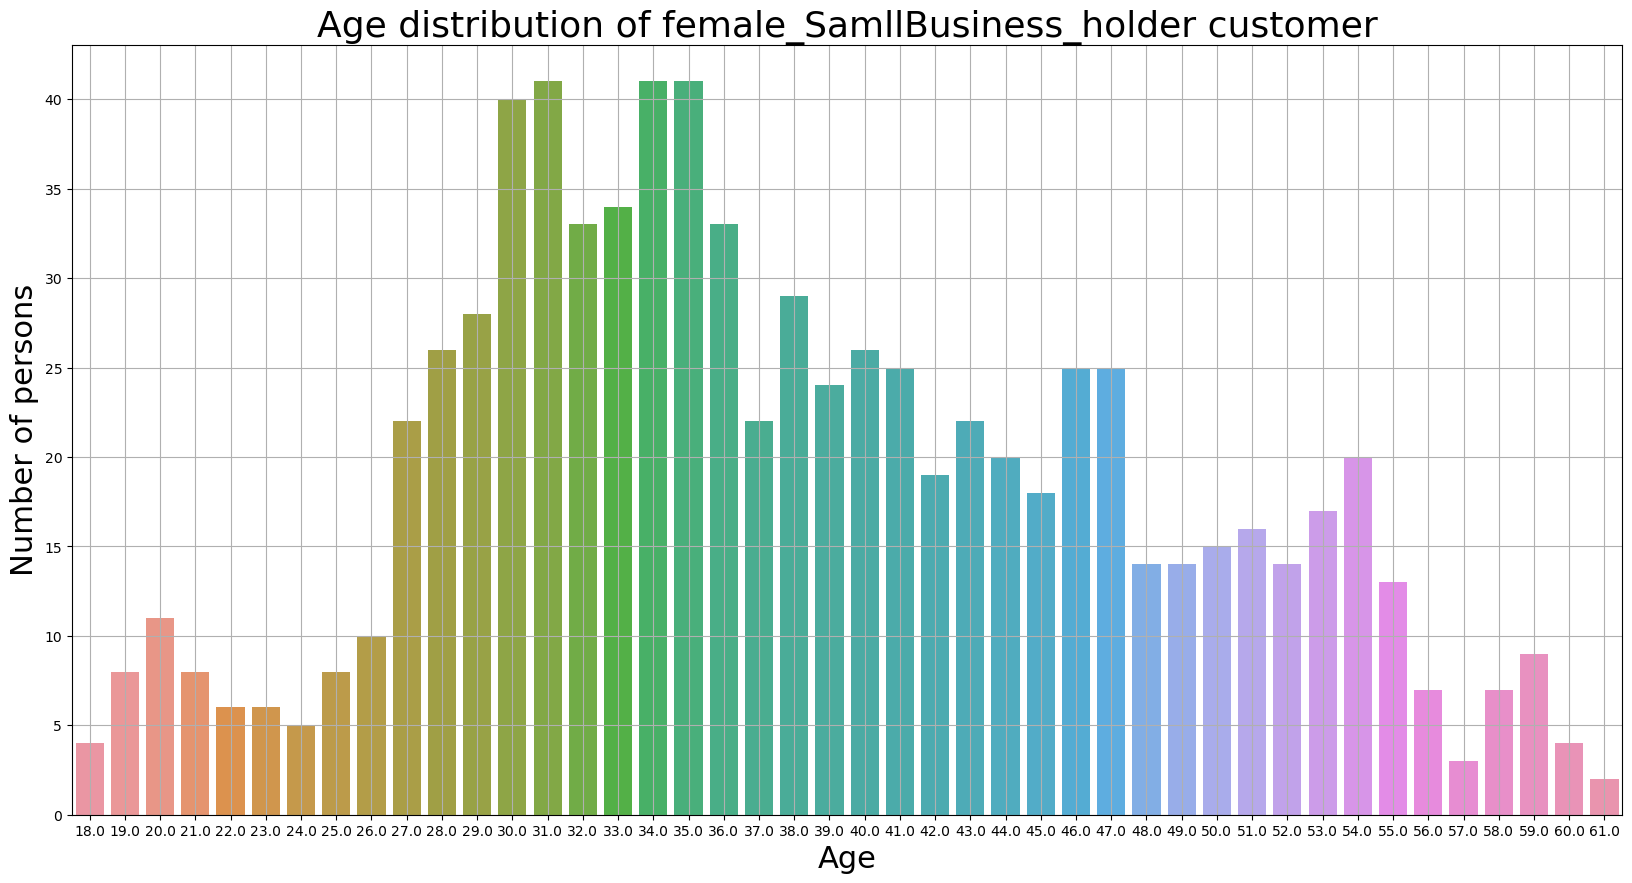

In [65]:
plt.figure(figsize=(20,10))
sns.barplot(x=female_SamllBusiness_holder["Age"].value_counts().index, 
            y=female_SamllBusiness_holder["Age"].value_counts().values)
plt.title('Age distribution of female_SamllBusiness_holder customer', fontsize=26)
plt.xlabel('Age', fontsize=22)
plt.ylabel('Number of persons', fontsize=22)
plt.grid()
plt.show()

In [66]:
# what type of contact are they(female_SamllBusiness_holde) have?

female_SamllBusiness_holder['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       591
Company Invited    253
Name: count, dtype: int64

In [67]:
# How many of them (female_SamllBusiness_holde) are having car ?

female_SamllBusiness_holder['OwnCar'].value_counts()

OwnCar
1    536
0    316
Name: count, dtype: int64

In [68]:
# avg monthly income of female small business holder

female_SamllBusiness_holder['MonthlyIncome'].sum()/len(female_SamllBusiness_holder)

22410.92840375587

In [69]:
19094111/852

22410.92840375587

In [70]:
# what type of room female small business holders like to preferred 

female_SamllBusiness_holder['PreferredPropertyStar'].value_counts()

PreferredPropertyStar
3.0    518
5.0    169
4.0    162
Name: count, dtype: int64

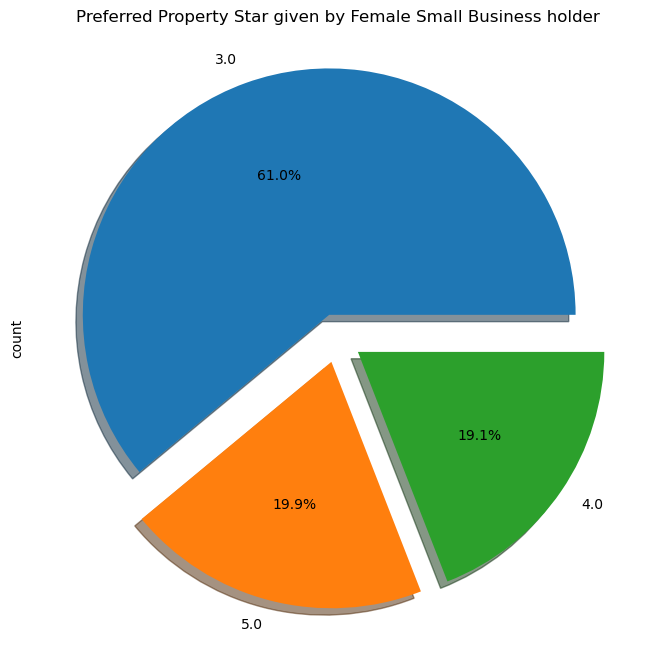

In [71]:
female_SamllBusiness_holder['PreferredPropertyStar'].value_counts().plot.pie(
    x = female_SamllBusiness_holder['PreferredPropertyStar'], autopct = '%1.1f%%', figsize = (8,8), explode=[0.1,0.1,0.1], 
    shadow=True)

plt.title("Preferred Property Star given by Female Small Business holder")
plt.show()

In [72]:
# what type of room they (female_SamllBusiness_holder) pitched

female_SamllBusiness_holder['ProductPitched'].value_counts()

ProductPitched
Deluxe          344
Basic           264
Standard        142
Super Deluxe     62
King             40
Name: count, dtype: int64

In [73]:
# how may female small business holder are there in the dataset who pitched king size room

df[(df['ProductPitched'] == 'King') & (df['Occupation'] == 'Small Business') & (df['Gender'] == 'Female')]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
29,200029,0,46.0,Self Enquiry,3,8.0,Small Business,Female,2,3.0,King,5.0,Single,4.0,0,2,0,1.0,VP,33947.0
62,200062,0,50.0,Self Enquiry,1,13.0,Small Business,Female,2,4.0,King,3.0,Married,6.0,1,4,1,1.0,VP,33740.0
186,200186,0,40.0,Self Enquiry,1,10.0,Small Business,Female,2,3.0,King,3.0,Divorced,2.0,0,5,0,1.0,VP,34033.0
233,200233,0,50.0,Self Enquiry,3,6.0,Small Business,Female,3,3.0,King,3.0,Married,4.0,0,2,1,1.0,VP,34517.0
749,200749,1,52.0,Self Enquiry,3,8.0,Small Business,Female,2,5.0,King,3.0,Divorced,2.0,0,3,1,NaN,VP,34845.0
858,200858,0,53.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,4.0,0,2,1,0.0,VP,33606.0
913,200913,1,45.0,Self Enquiry,3,8.0,Small Business,Female,3,5.0,King,4.0,Single,3.0,1,5,0,2.0,VP,33824.0
916,200916,0,46.0,Self Enquiry,3,10.0,Small Business,Female,2,4.0,King,4.0,Divorced,3.0,0,5,1,0.0,VP,33789.0
936,200936,0,45.0,Company Invited,1,31.0,Small Business,Female,2,3.0,King,4.0,Single,4.0,0,4,1,1.0,VP,33061.0
955,200955,0,55.0,Self Enquiry,1,8.0,Small Business,Female,2,5.0,King,3.0,Divorced,5.0,0,4,1,1.0,VP,34187.0


Insights: Those customers who booked King sized room the position of them are VP

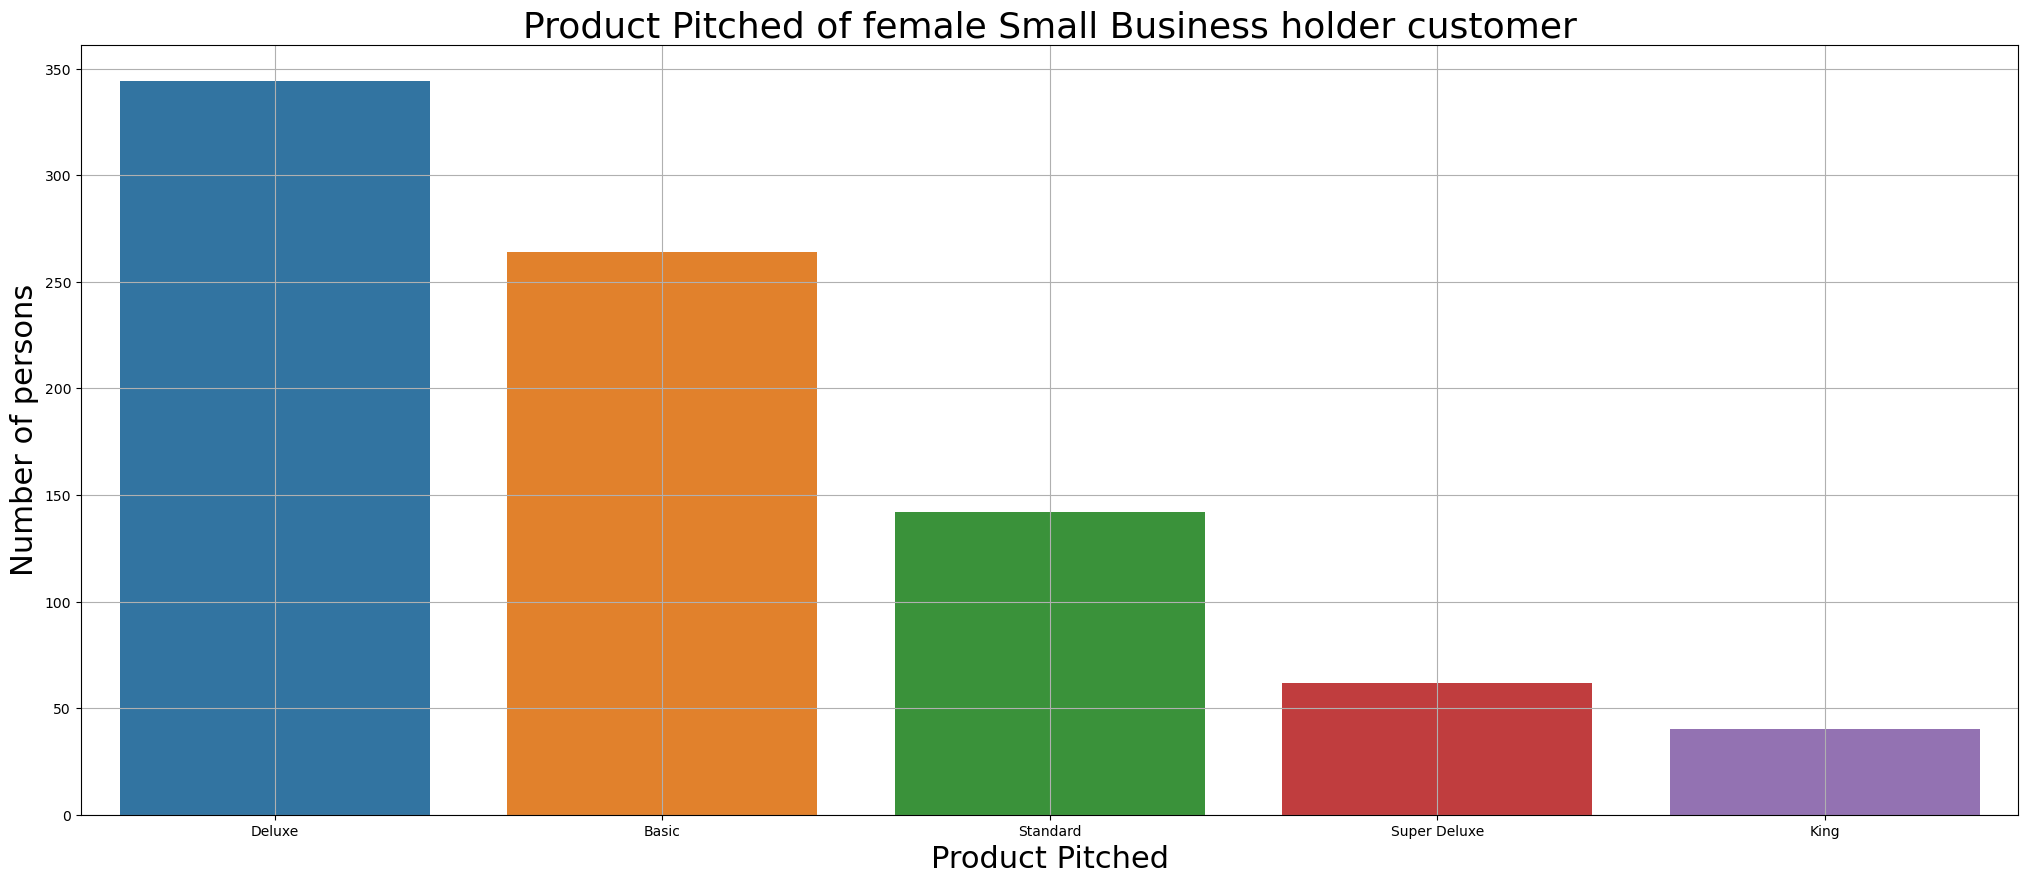

In [74]:
plt.figure(figsize=(25,10))
sns.barplot(x=female_SamllBusiness_holder['ProductPitched'].value_counts().index, 
            y=female_SamllBusiness_holder['ProductPitched'].value_counts().values)
plt.title('Product Pitched of female Small Business holder customer', fontsize=26)
plt.xlabel('Product Pitched', fontsize=22)
plt.ylabel('Number of persons', fontsize=22)
plt.grid()
plt.show()

In [75]:
# what is the matiral status of the female small business holders

female_SamllBusiness_holder['MaritalStatus'].value_counts()

MaritalStatus
Married      402
Divorced     170
Single       144
Unmarried    136
Name: count, dtype: int64

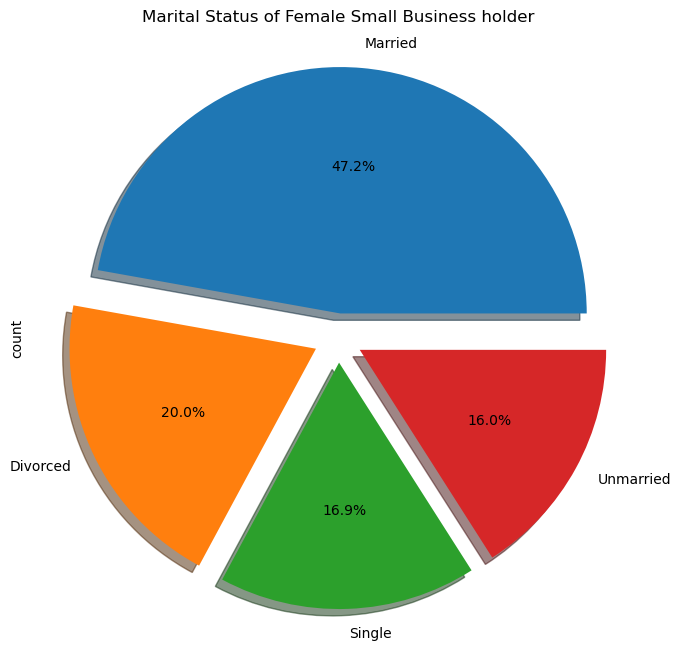

In [76]:
female_SamllBusiness_holder['MaritalStatus'].value_counts().plot.pie(
    x = female_SamllBusiness_holder['MaritalStatus'], autopct = '%1.1f%%', figsize = (8,8), explode=[0.1,0.1,0.1,0.1], 
    shadow=True)
plt.title("Marital Status of Female Small Business holder")
plt.show()

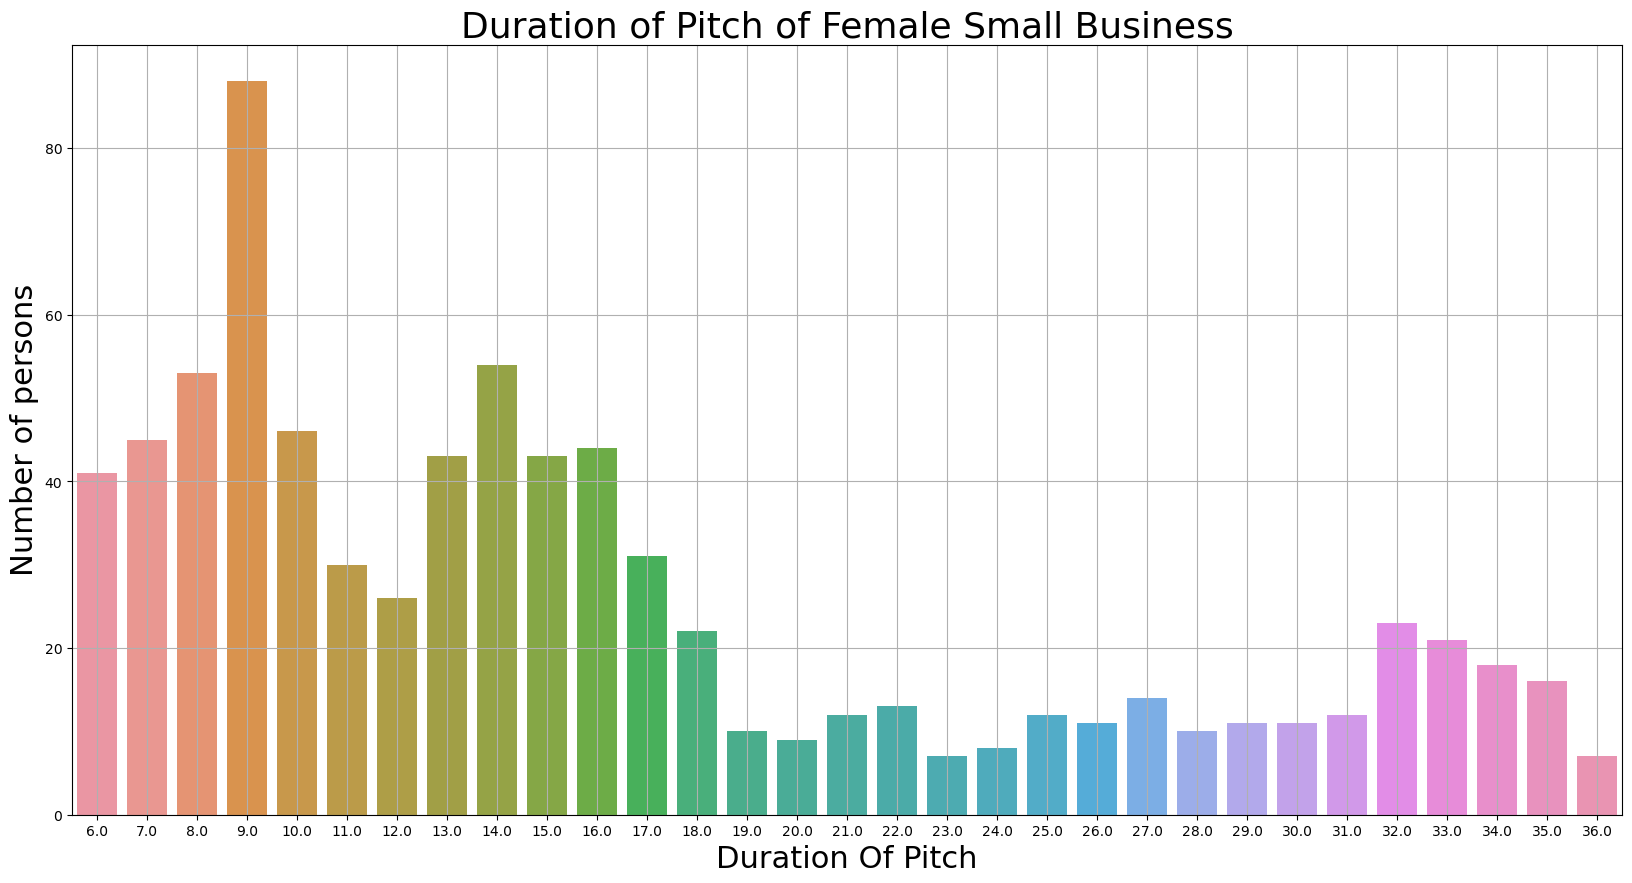

In [77]:
plt.figure(figsize=(20,10))
sns.barplot(x=female_SamllBusiness_holder['DurationOfPitch'].value_counts().index, 
            y=female_SamllBusiness_holder['DurationOfPitch'].value_counts().values)
plt.title('Duration of Pitch of Female Small Business', fontsize=26)
plt.xlabel('Duration Of Pitch', fontsize=22)
plt.ylabel('Number of persons', fontsize=22)
plt.grid()
plt.show()

In [78]:
female_SamllBusiness_holder['CityTier'].value_counts()

CityTier
1    496
3    350
2      6
Name: count, dtype: int64

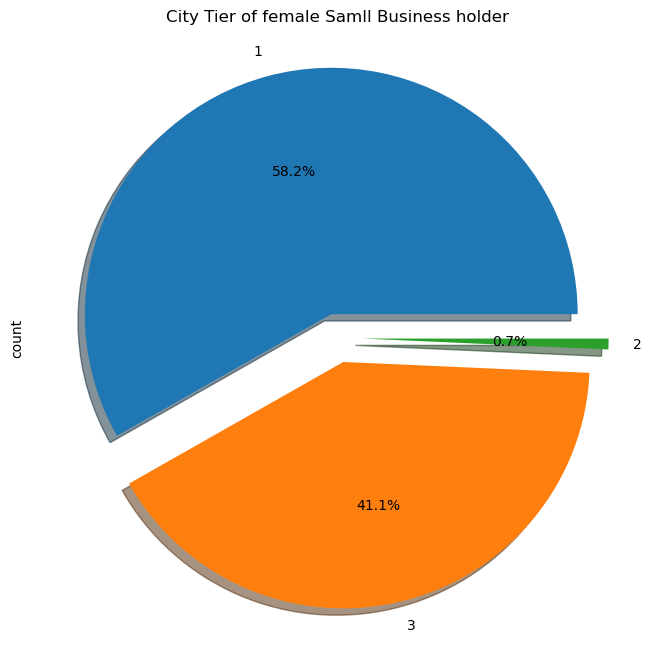

In [79]:
female_SamllBusiness_holder['CityTier'].value_counts().plot.pie(x = female_SamllBusiness_holder['CityTier'], 
                                                                autopct = '%1.1f%%', figsize = (8,8), explode=[0.1,0.1,0.1], 
                                                                shadow=True)
plt.title("City Tier of female Samll Business holder")
plt.show()

# male_SamllBusiness_holder

In [80]:
# how many male Small Business holder are there in this dataset?


male_SamllBusiness_holder = df[(df['Occupation'] == 'Small Business') & (df['Gender'] == 'Male')]
male_SamllBusiness_holder

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0
10,200010,0,35.0,Self Enquiry,1,22.0,Small Business,Male,2,2.0,Basic,4.0,Divorced,1.0,0,3,1,1.0,Executive,17426.0
13,200013,0,34.0,Self Enquiry,1,25.0,Small Business,Male,3,3.0,Basic,3.0,Married,1.0,0,3,0,2.0,Executive,17661.0
17,200017,0,22.0,Company Invited,1,22.0,Small Business,Male,3,2.0,Basic,3.0,Married,2.0,1,3,0,0.0,Executive,17935.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,204873,1,41.0,Self Enquiry,3,14.0,Small Business,Male,3,4.0,Basic,4.0,Unmarried,3.0,0,5,0,1.0,Executive,23339.0
4875,204875,1,36.0,Company Invited,1,8.0,Small Business,Male,4,4.0,Basic,4.0,Married,3.0,1,3,1,1.0,Executive,22927.0
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0


In [81]:
male_SamllBusiness_holder["Age"].value_counts()

Age
35.0    56
34.0    52
36.0    51
32.0    48
37.0    48
40.0    46
33.0    46
29.0    46
28.0    46
31.0    45
41.0    44
27.0    42
38.0    41
26.0    39
42.0    36
30.0    35
46.0    33
43.0    32
39.0    30
47.0    28
51.0    27
45.0    25
25.0    22
55.0    21
44.0    20
50.0    19
56.0    19
53.0    18
48.0    17
24.0    17
52.0    15
54.0    14
22.0    13
49.0    12
21.0    11
23.0    11
19.0     8
60.0     8
58.0     7
57.0     6
20.0     6
18.0     6
59.0     6
61.0     5
Name: count, dtype: int64

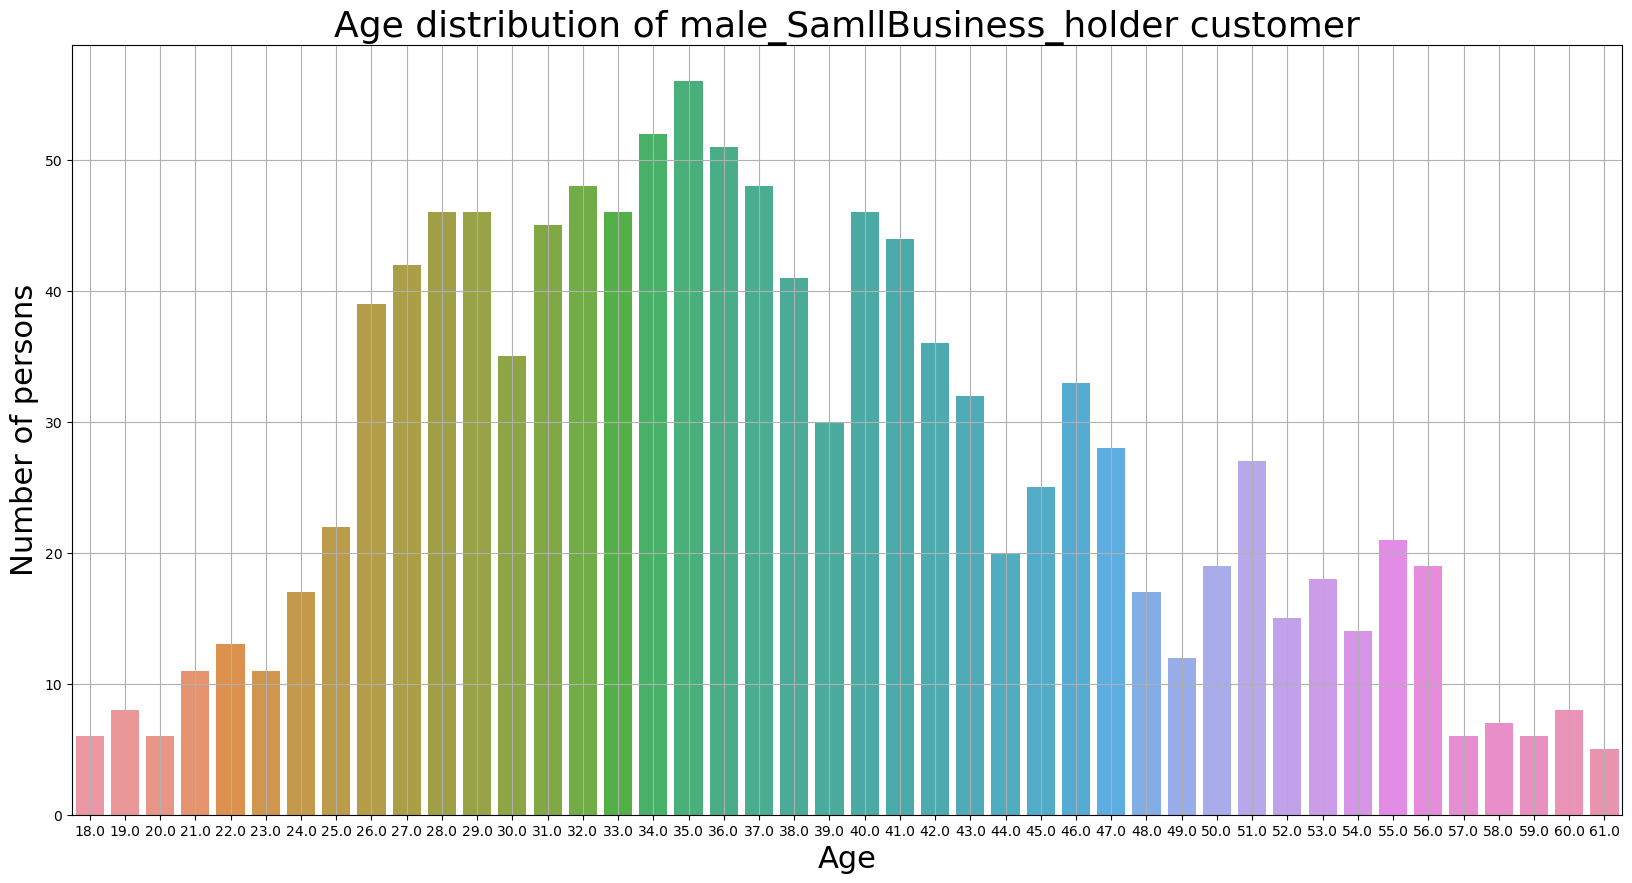

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(x=male_SamllBusiness_holder["Age"].value_counts().index, 
            y=male_SamllBusiness_holder["Age"].value_counts().values)
plt.title('Age distribution of male_SamllBusiness_holder customer', fontsize=26)
plt.xlabel('Age', fontsize=22)
plt.ylabel('Number of persons', fontsize=22)
plt.grid()
plt.show()

In [83]:
# what type of contact are they(male_SamllBusiness_holde) have?

male_SamllBusiness_holder['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       890
Company Invited    330
Name: count, dtype: int64

In [84]:
male_SamllBusiness_holder['Designation'].value_counts()

Designation
Executive         456
Manager           446
Senior Manager    178
AVP                88
VP                 64
Name: count, dtype: int64

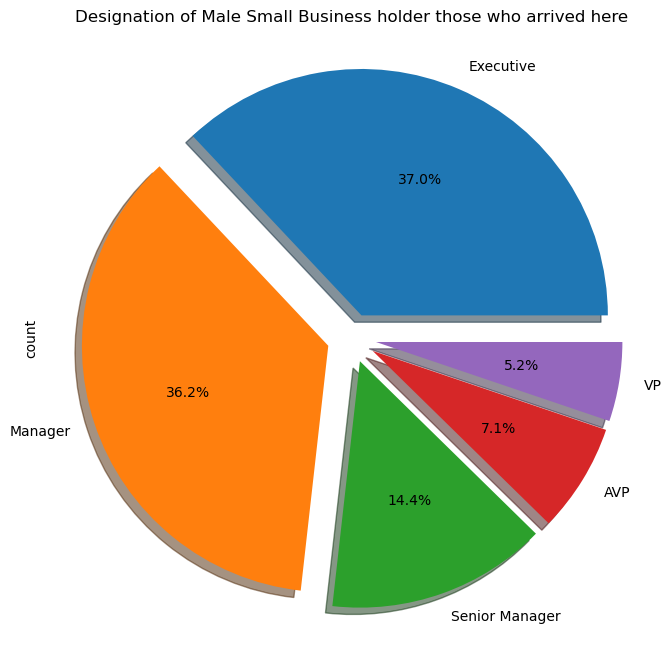

In [85]:
male_SamllBusiness_holder['Designation'].value_counts().plot.pie(
    x = male_SamllBusiness_holder['Designation'], autopct = '%1.1f%%', figsize = (8,8), explode=[0.1,0.1,0.1,0.1,0.1], 
    shadow=True)
plt.title("Designation of Male Small Business holder those who arrived here")
plt.show()

In [86]:
# what is the matiral status of the male small business holders

male_SamllBusiness_holder['MaritalStatus'].value_counts()

MaritalStatus
Married      616
Divorced     240
Single       234
Unmarried    142
Name: count, dtype: int64

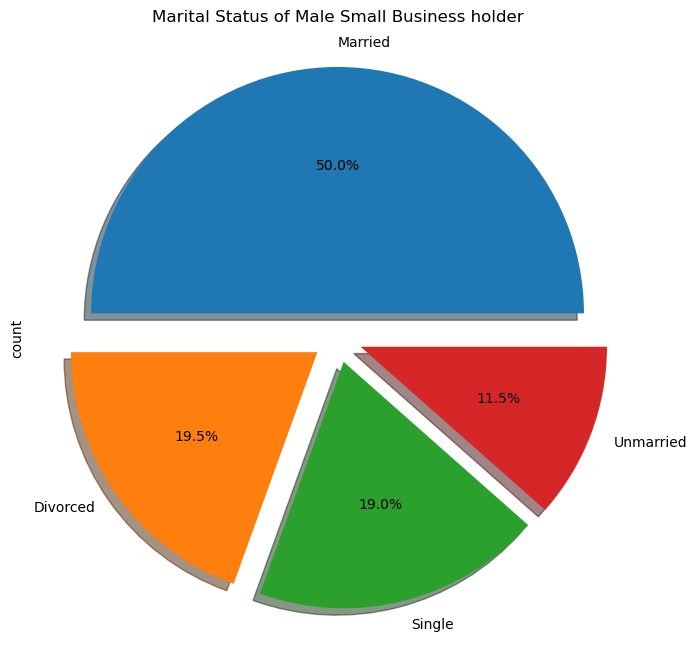

In [87]:
male_SamllBusiness_holder['MaritalStatus'].value_counts().plot.pie(
    x = male_SamllBusiness_holder['MaritalStatus'], autopct = '%1.1f%%', figsize = (8,8), explode=[0.1,0.1,0.1,0.1], 
    shadow=True)
plt.title("Marital Status of Male Small Business holder")
plt.show()

In [88]:
# How many of them (male_SamllBusiness_holde) are having car ?

male_SamllBusiness_holder['OwnCar'].value_counts()

OwnCar
1    712
0    520
Name: count, dtype: int64

In [89]:
# avg monthly income of male small business holder

male_SamllBusiness_holder['MonthlyIncome'].sum()/len(male_SamllBusiness_holder)

22476.335227272728

In [90]:
27690845/1232

22476.335227272728

In [91]:
# what type of room they (male_SamllBusiness_holder) pitched

male_SamllBusiness_holder['ProductPitched'].value_counts()

ProductPitched
Basic           456
Deluxe          446
Standard        178
Super Deluxe     88
King             64
Name: count, dtype: int64

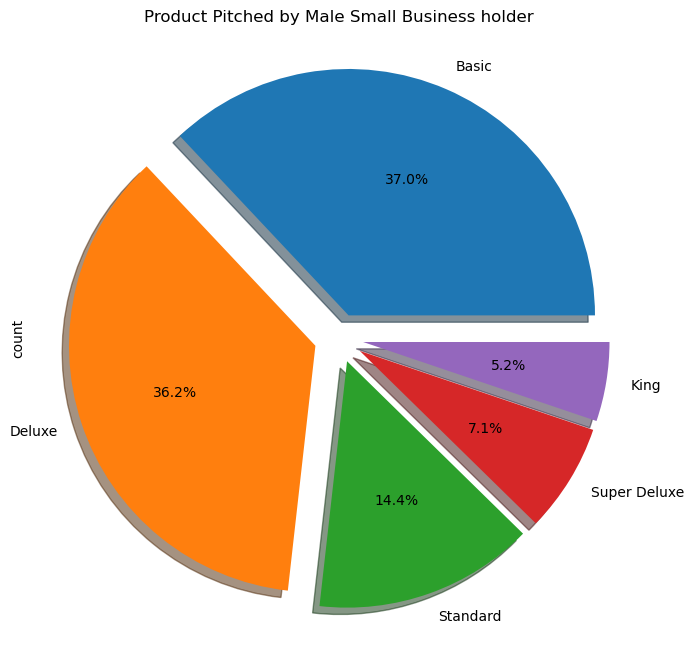

In [92]:
male_SamllBusiness_holder['ProductPitched'].value_counts().plot.pie(
    x = male_SamllBusiness_holder['ProductPitched'], autopct = '%1.1f%%', figsize = (8,8), explode=[0.1,0.1,0.1,0.1,0.1], 
    shadow=True)
plt.title("Product Pitched by Male Small Business holder")
plt.show()

In [93]:
# how many male small business holder are there in the dataset who pitched king size room

df[(df['ProductPitched'] == 'King') & (df['Occupation'] == 'Small Business') & (df['Gender'] == 'Male')]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
187,200187,0,55.0,Self Enquiry,1,20.0,Small Business,Male,3,2.0,King,4.0,Single,1.0,0,2,0,2.0,VP,33722.0
257,200257,0,40.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,King,3.0,Married,1.0,0,5,0,0.0,VP,34436.0
270,200270,0,55.0,Self Enquiry,1,6.0,Small Business,Male,2,3.0,King,5.0,Single,1.0,1,2,1,0.0,VP,34045.0
326,200326,0,39.0,Company Invited,1,5.0,Small Business,Male,2,4.0,King,3.0,Divorced,2.0,0,5,1,1.0,VP,34272.0
392,200392,0,54.0,Self Enquiry,1,11.0,Small Business,Male,2,3.0,King,5.0,Divorced,5.0,0,4,1,0.0,VP,34406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,204655,0,43.0,Self Enquiry,3,12.0,Small Business,Male,3,4.0,King,3.0,Married,NaN,0,4,0,2.0,VP,36981.0
4680,204680,0,51.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,3.0,Married,NaN,1,1,1,3.0,VP,37915.0
4684,204684,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,1.0,VP,38305.0
4728,204728,0,41.0,Self Enquiry,1,21.0,Small Business,Male,3,5.0,King,3.0,Single,3.0,0,3,1,2.0,VP,38304.0


Insights: Those customers who booked King sized room the Designation of them are VP 

In [94]:
# what type of room male small business holders like to preferred 

male_SamllBusiness_holder['PreferredPropertyStar'].value_counts()

PreferredPropertyStar
3.0    712
4.0    261
5.0    254
Name: count, dtype: int64

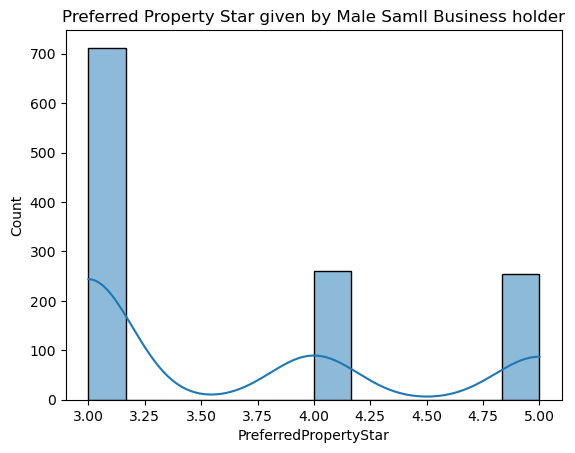

In [95]:
sns.histplot(male_SamllBusiness_holder['PreferredPropertyStar'], kde=True)
plt.title('Preferred Property Star given by Male Samll Business holder')
plt.show()

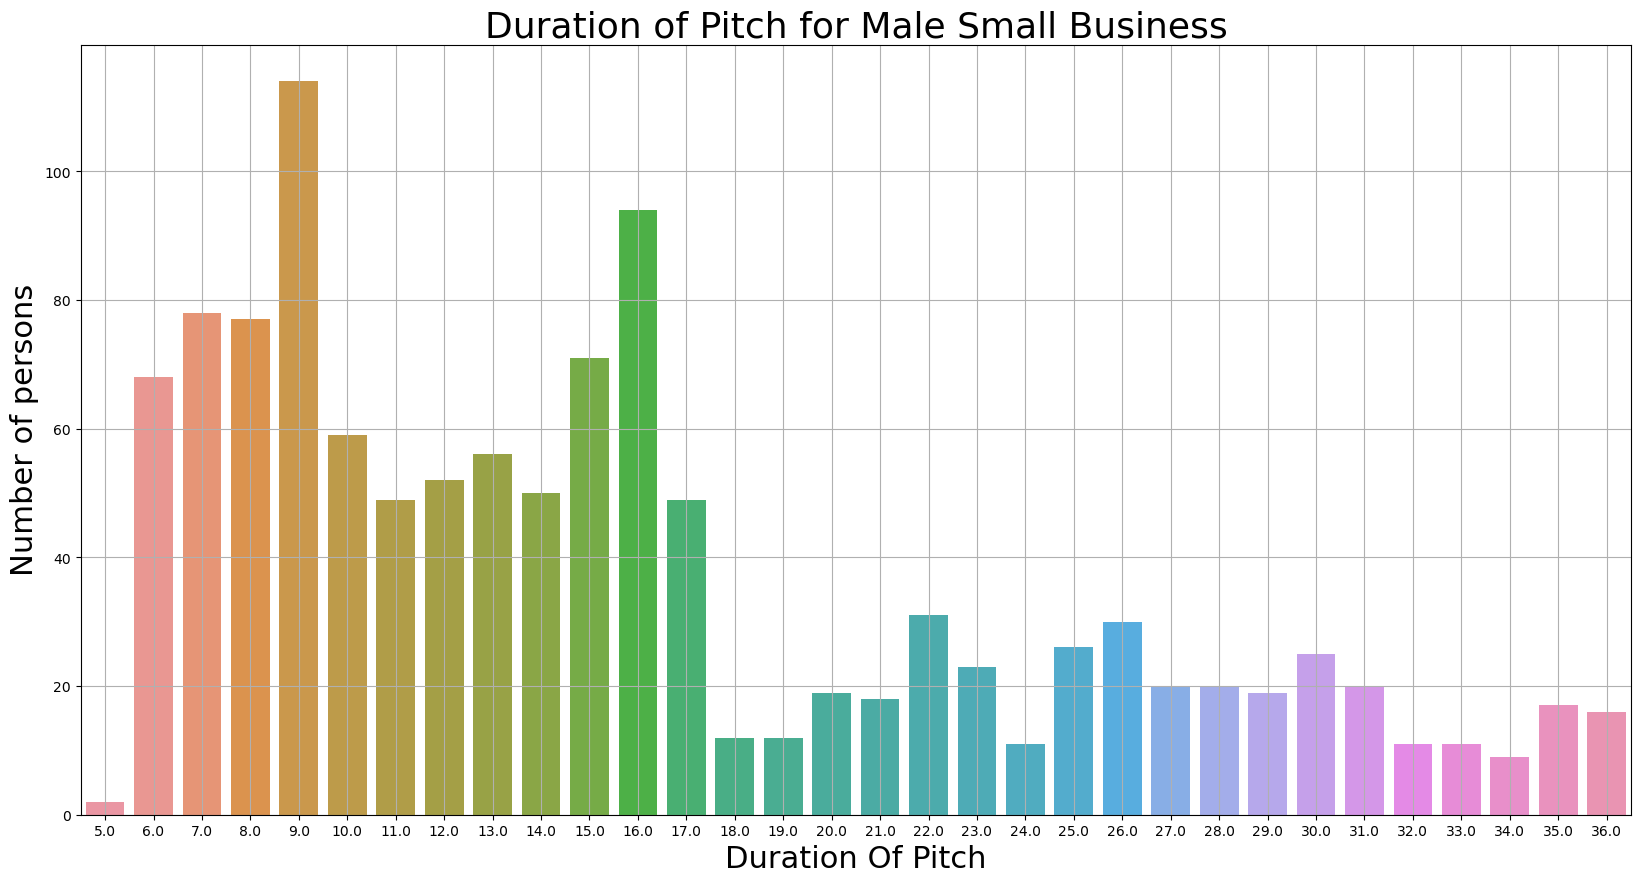

In [96]:
plt.figure(figsize=(20,10))
sns.barplot(x=male_SamllBusiness_holder['DurationOfPitch'].value_counts().index, 
            y=male_SamllBusiness_holder['DurationOfPitch'].value_counts().values)
plt.title('Duration of Pitch for Male Small Business', fontsize=26)
plt.xlabel('Duration Of Pitch', fontsize=22)
plt.ylabel('Number of persons', fontsize=22)
plt.grid()
plt.show()

In [97]:
male_SamllBusiness_holder['CityTier'].value_counts()

CityTier
1    712
3    482
2     38
Name: count, dtype: int64

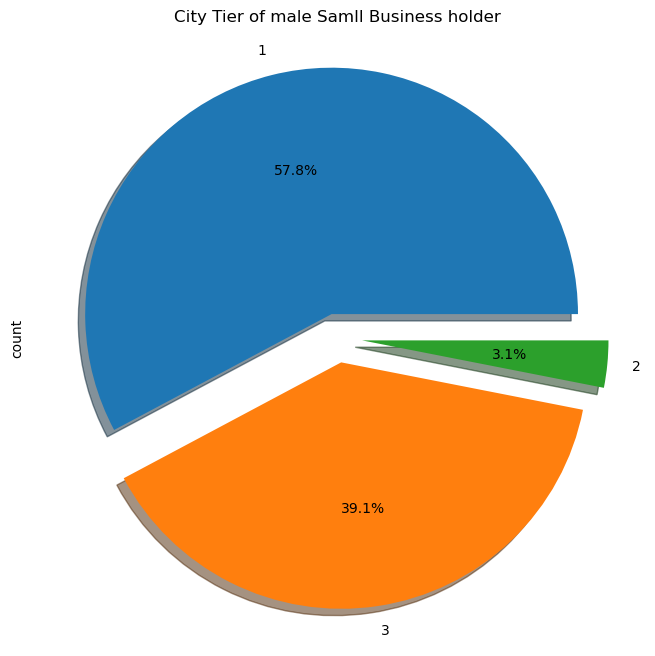

In [98]:
male_SamllBusiness_holder['CityTier'].value_counts().plot.pie(x = male_SamllBusiness_holder['CityTier'], 
                                                                autopct = '%1.1f%%', figsize = (8,8), explode=[0.1,0.1,0.1], 
    shadow=True)
plt.title("City Tier of male Samll Business holder")
plt.show()

# Male Large Business

In [99]:
male_LargeBusiness_holder = df[(df['Occupation'] == 'Large Business') & (df['Gender'] == 'Male')]
male_LargeBusiness_holder

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
33,200033,1,39.0,Self Enquiry,3,11.0,Large Business,Male,2,3.0,Deluxe,3.0,Divorced,4.0,0,2,0,1.0,Manager,17086.0
51,200051,1,NaN,Self Enquiry,1,11.0,Large Business,Male,2,3.0,Basic,3.0,Single,2.0,1,2,1,0.0,Executive,18441.0
86,200086,0,23.0,Self Enquiry,3,8.0,Large Business,Male,3,3.0,Basic,5.0,Married,4.0,0,3,1,1.0,Executive,17322.0
128,200128,0,22.0,Self Enquiry,1,8.0,Large Business,Male,3,3.0,Basic,3.0,Divorced,1.0,0,5,1,2.0,Executive,17523.0
155,200155,0,29.0,Company Invited,1,NaN,Large Business,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,0,1.0,Manager,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,204791,0,47.0,Self Enquiry,1,9.0,Large Business,Male,3,4.0,Deluxe,3.0,Married,4.0,0,1,0,1.0,Manager,26057.0
4814,204814,0,37.0,Company Invited,1,10.0,Large Business,Male,3,4.0,Basic,4.0,Married,3.0,0,3,0,2.0,Executive,22370.0
4842,204842,1,45.0,Company Invited,3,8.0,Large Business,Male,4,4.0,Basic,3.0,Married,5.0,0,3,1,2.0,Executive,26656.0
4847,204847,1,29.0,Self Enquiry,1,8.0,Large Business,Male,4,5.0,Basic,5.0,Single,8.0,0,3,1,2.0,Executive,20758.0


In [100]:
male_LargeBusiness_holder["Age"].value_counts()

Age
29.0    16
35.0    14
30.0    14
27.0    13
28.0    13
36.0    12
31.0    11
32.0     9
26.0     9
23.0     7
43.0     7
34.0     7
46.0     7
50.0     7
45.0     6
33.0     6
37.0     6
40.0     6
42.0     5
56.0     5
39.0     4
20.0     4
41.0     4
59.0     4
49.0     4
51.0     4
24.0     4
22.0     4
44.0     3
55.0     3
48.0     3
38.0     3
47.0     3
21.0     2
60.0     2
53.0     2
58.0     2
25.0     2
52.0     2
19.0     2
57.0     1
Name: count, dtype: int64

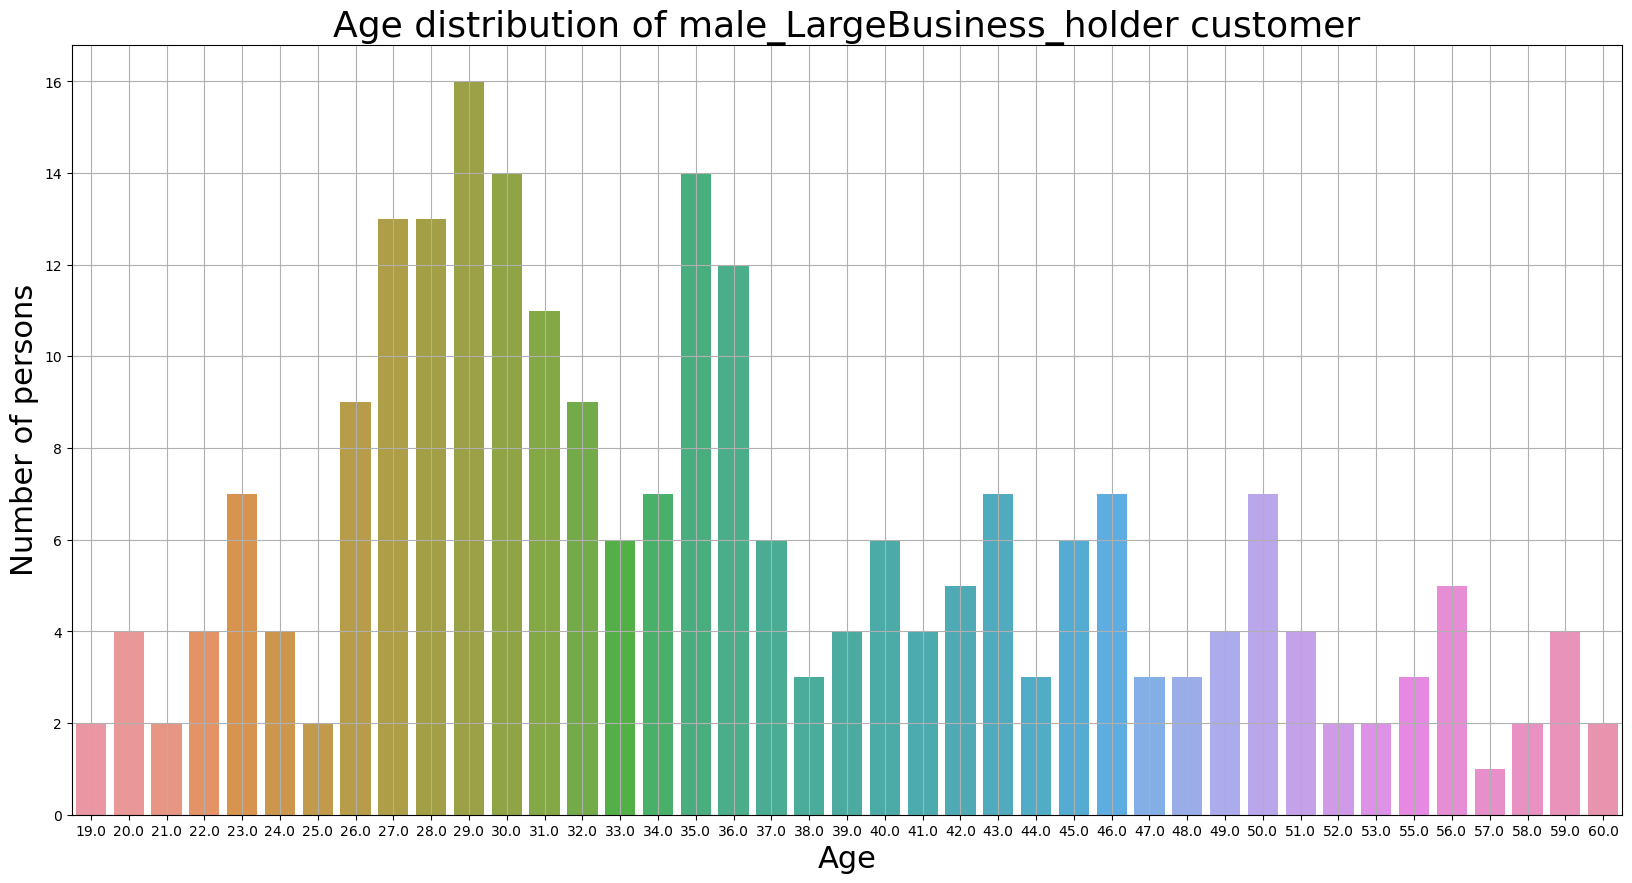

In [101]:
plt.figure(figsize=(20,10))
sns.barplot(x=male_LargeBusiness_holder["Age"].value_counts().index, 
            y=male_LargeBusiness_holder["Age"].value_counts().values)
plt.title('Age distribution of male_LargeBusiness_holder customer', fontsize=26)
plt.xlabel('Age', fontsize=22)
plt.ylabel('Number of persons', fontsize=22)
plt.grid()
plt.show()

In [102]:
male_LargeBusiness_holder['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       192
Company Invited     64
Name: count, dtype: int64

In [103]:
male_LargeBusiness_holder['DurationOfPitch'].value_counts()

DurationOfPitch
9.0     26
11.0    25
8.0     24
10.0    19
7.0     18
12.0    16
14.0    14
6.0     12
15.0    11
31.0     8
30.0     7
13.0     7
26.0     6
23.0     6
16.0     5
35.0     5
27.0     5
17.0     5
24.0     5
36.0     4
28.0     4
29.0     3
32.0     2
34.0     2
22.0     1
20.0     1
21.0     1
Name: count, dtype: int64

In [104]:
male_LargeBusiness_holder['DurationOfPitch'].value_counts().index

Index([ 9.0, 11.0,  8.0, 10.0,  7.0, 12.0, 14.0,  6.0, 15.0, 31.0, 30.0, 13.0,
       26.0, 23.0, 16.0, 35.0, 27.0, 17.0, 24.0, 36.0, 28.0, 29.0, 32.0, 34.0,
       22.0, 20.0, 21.0],
      dtype='float64', name='DurationOfPitch')

In [105]:
male_LargeBusiness_holder['DurationOfPitch'].value_counts().values

array([26, 25, 24, 19, 18, 16, 14, 12, 11,  8,  7,  7,  6,  6,  5,  5,  5,
        5,  5,  4,  4,  3,  2,  2,  1,  1,  1], dtype=int64)

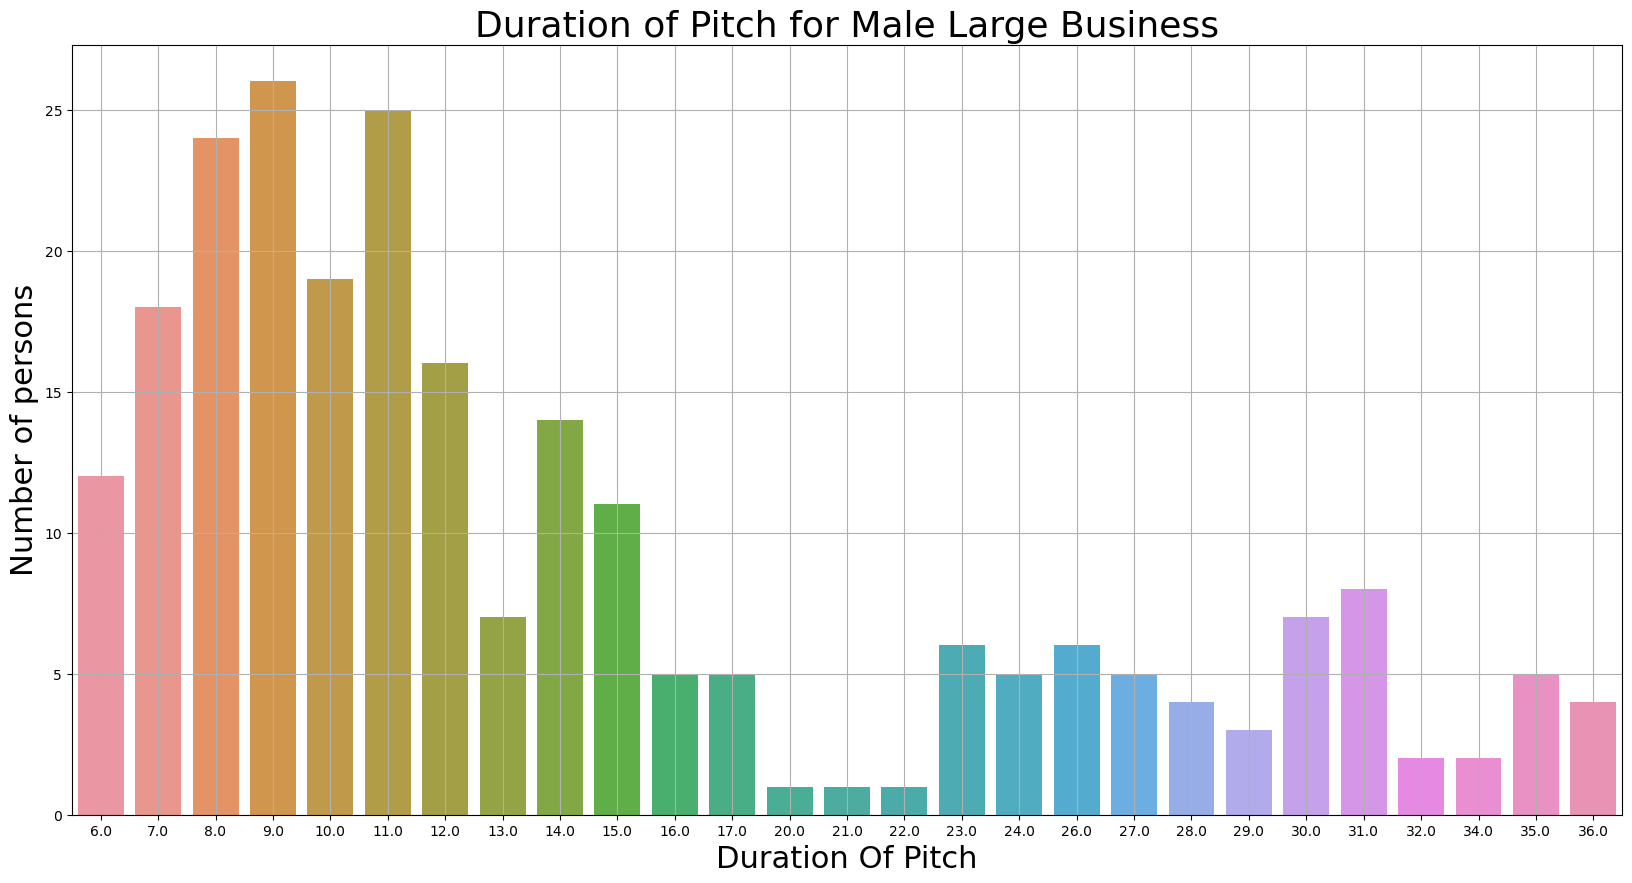

In [106]:
plt.figure(figsize=(20,10))
sns.barplot(x=male_LargeBusiness_holder['DurationOfPitch'].value_counts().index, 
            y=male_LargeBusiness_holder['DurationOfPitch'].value_counts().values)
plt.title('Duration of Pitch for Male Large Business', fontsize=26)
plt.xlabel('Duration Of Pitch', fontsize=22)
plt.ylabel('Number of persons', fontsize=22)
plt.grid()
plt.show()

In [107]:
male_LargeBusiness_holder['ProductPitched'].value_counts()

ProductPitched
Basic           130
Deluxe           78
Standard         40
King              4
Super Deluxe      4
Name: count, dtype: int64

In [108]:
df[(df['ProductPitched'] == 'Super Deluxe') & (df['Occupation'] == 'Large Business') & (df['Gender'] == 'Male')]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
821,200821,0,49.0,Self Enquiry,3,14.0,Large Business,Male,2,4.0,Super Deluxe,4.0,Divorced,7.0,0,4,1,0.0,AVP,28120.0
2291,202291,0,49.0,Self Enquiry,3,14.0,Large Business,Male,2,4.0,Super Deluxe,4.0,Married,7.0,0,4,1,1.0,AVP,28120.0
3265,203265,0,50.0,Self Enquiry,3,15.0,Large Business,Male,3,5.0,Super Deluxe,4.0,Divorced,8.0,0,4,1,1.0,AVP,31798.0
4735,204735,0,50.0,Self Enquiry,3,15.0,Large Business,Male,3,5.0,Super Deluxe,4.0,Married,8.0,0,4,1,2.0,AVP,31798.0


In [109]:
df[(df['ProductPitched'] == 'King') & (df['Occupation'] == 'Large Business') & (df['Gender'] == 'Male')]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
231,200231,0,42.0,Self Enquiry,1,10.0,Large Business,Male,2,3.0,King,3.0,Divorced,2.0,0,2,0,1.0,VP,34232.0
1701,201701,0,42.0,Self Enquiry,1,10.0,Large Business,Male,2,3.0,King,3.0,Married,2.0,0,1,0,0.0,VP,34232.0
2675,202675,0,43.0,Self Enquiry,1,11.0,Large Business,Male,3,4.0,King,3.0,Divorced,NaN,0,2,0,2.0,VP,37910.0
4145,204145,0,43.0,Self Enquiry,1,11.0,Large Business,Male,3,4.0,King,3.0,Married,NaN,0,1,0,1.0,VP,37910.0


In [110]:
male_LargeBusiness_holder['PitchSatisfactionScore'].value_counts()

PitchSatisfactionScore
3    96
5    46
4    46
1    40
2    28
Name: count, dtype: int64

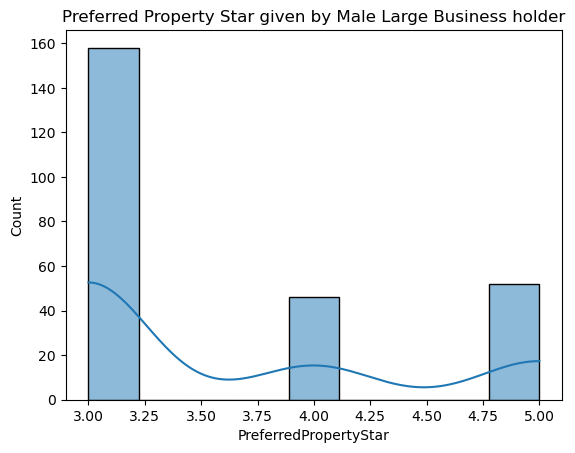

In [111]:
sns.histplot(male_LargeBusiness_holder['PreferredPropertyStar'], kde=True)
plt.title('Preferred Property Star given by Male Large Business holder')
plt.show()

In [112]:
# These are the large business male who gives 5 to the pitch statisfaction score

df[(df['PitchSatisfactionScore'] == 5) & (df['Occupation'] == 'Large Business') & (df['Gender'] == 'Male')]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
128,200128,0,22.0,Self Enquiry,1,8.0,Large Business,Male,3,3.0,Basic,3.0,Divorced,1.0,0,5,1,2.0,Executive,17523.0
367,200367,0,50.0,Self Enquiry,1,16.0,Large Business,Male,3,4.0,Standard,3.0,Unmarried,7.0,0,5,0,2.0,Senior Manager,25496.0
443,200443,1,NaN,Company Invited,1,10.0,Large Business,Male,2,4.0,Basic,3.0,Single,6.0,0,5,1,0.0,Executive,NaN
454,200454,0,29.0,Self Enquiry,1,NaN,Large Business,Male,2,3.0,Deluxe,3.0,Married,5.0,0,5,0,0.0,Manager,NaN
528,200528,1,50.0,Company Invited,3,14.0,Large Business,Male,2,3.0,Deluxe,3.0,Divorced,4.0,1,5,1,0.0,Manager,21796.0
564,200564,0,45.0,Self Enquiry,3,8.0,Large Business,Male,2,5.0,Deluxe,3.0,Unmarried,1.0,0,5,0,0.0,Manager,21632.0
835,200835,0,35.0,Self Enquiry,2,NaN,Large Business,Male,3,3.0,Basic,3.0,Single,2.0,0,5,0,1.0,Executive,NaN
1003,201003,0,25.0,Self Enquiry,1,6.0,Large Business,Male,2,3.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,18229.0
1022,201022,0,NaN,Company Invited,1,11.0,Large Business,Male,2,1.0,Basic,3.0,Single,1.0,0,5,1,0.0,Executive,18500.0
1037,201037,0,45.0,Self Enquiry,1,35.0,Large Business,Male,2,3.0,Standard,3.0,Divorced,5.0,1,5,1,0.0,Senior Manager,24380.0


In [113]:
male_LargeBusiness_holder['CityTier'].value_counts()

CityTier
1    180
3     64
2     12
Name: count, dtype: int64

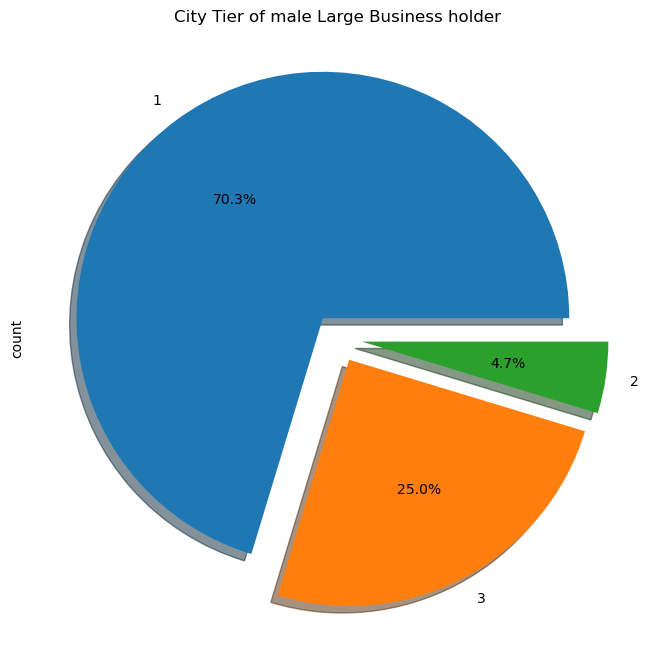

In [114]:
male_LargeBusiness_holder['CityTier'].value_counts().plot.pie(x = male_LargeBusiness_holder['CityTier'], 
                                                                autopct = '%1.1f%%', figsize = (8,8), explode=[0.1,0.1,0.1], 
    shadow=True)
plt.title("City Tier of male Large Business holder")
plt.show()

# female_LargeBusiness_holder

In [115]:
female_LargeBusiness_holder = df[(df['Occupation'] == 'Large Business') & (df['Gender'] == 'Female')]
female_LargeBusiness_holder

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
45,200045,1,41.0,Self Enquiry,1,18.0,Large Business,Female,2,3.0,King,3.0,Divorced,2.0,0,4,1,0.0,VP,34545.0
64,200064,0,36.0,Self Enquiry,1,14.0,Large Business,Female,2,3.0,Standard,3.0,Married,2.0,0,4,1,1.0,Senior Manager,25096.0
95,200095,0,54.0,Self Enquiry,1,8.0,Large Business,Female,2,3.0,Standard,3.0,Divorced,1.0,0,4,1,0.0,Senior Manager,28549.0
117,200117,0,36.0,Company Invited,3,17.0,Large Business,Female,3,3.0,Standard,3.0,Divorced,1.0,0,5,0,0.0,Senior Manager,24738.0
142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,204798,0,41.0,Self Enquiry,3,17.0,Large Business,Female,3,5.0,Deluxe,4.0,Married,2.0,0,5,1,2.0,Manager,25530.0
4819,204819,1,30.0,Self Enquiry,1,14.0,Large Business,Female,3,4.0,Basic,3.0,Married,5.0,1,4,1,NaN,Executive,34802.0
4841,204841,1,37.0,Self Enquiry,2,16.0,Large Business,Female,3,4.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,24088.0
4843,204843,1,29.0,Company Invited,3,20.0,Large Business,Female,3,4.0,Deluxe,4.0,Unmarried,7.0,0,3,1,1.0,Manager,22545.0


In [116]:
female_LargeBusiness_holder['ProductPitched'].value_counts()

ProductPitched
Basic           66
Deluxe          46
Standard        44
Super Deluxe    14
King             8
Name: count, dtype: int64

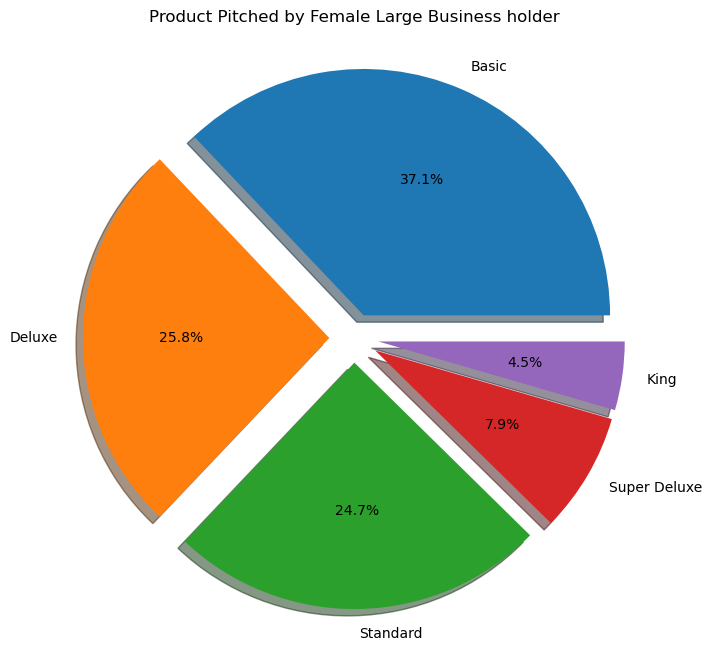

In [142]:
female_LargeBusiness_holder['ProductPitched'].value_counts().plot.pie(x = female_LargeBusiness_holder['ProductPitched'],
                                                                     autopct = '%1.1f%%', figsize = (8,8), 
                                                                      explode=[0.1,0.1,0.1,0.1,0.1], shadow=True)
plt.title("Product Pitched by Female Large Business holder")
plt.ylabel(" ")
plt.show()

In [118]:
df[(df['ProductPitched'] == 'Super Deluxe') & (df['Occupation'] == 'Large Business') & (df['Gender'] == 'Female')]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
263,200263,0,46.0,Self Enquiry,3,8.0,Large Business,Female,3,5.0,Super Deluxe,4.0,Divorced,4.0,1,5,1,2.0,AVP,31872.0
316,200316,0,49.0,Self Enquiry,1,6.0,Large Business,Female,2,4.0,Super Deluxe,3.0,Single,1.0,1,3,1,0.0,AVP,28964.0
971,200971,0,51.0,Self Enquiry,1,17.0,Large Business,Female,2,4.0,Super Deluxe,4.0,Unmarried,4.0,0,1,0,1.0,AVP,28142.0
1225,201225,0,45.0,Self Enquiry,1,34.0,Large Business,Female,2,4.0,Super Deluxe,4.0,Single,2.0,0,3,1,0.0,AVP,31704.0
1327,201327,0,46.0,Self Enquiry,3,9.0,Large Business,Female,2,1.0,Super Deluxe,5.0,Married,3.0,0,3,1,0.0,AVP,28225.0
1733,201733,0,46.0,Self Enquiry,3,8.0,Large Business,Female,3,5.0,Super Deluxe,4.0,Married,4.0,1,5,1,0.0,AVP,31872.0
1786,201786,0,49.0,Self Enquiry,1,6.0,Large Business,Female,2,4.0,Super Deluxe,3.0,Single,1.0,1,3,0,0.0,AVP,28964.0
2707,202707,0,47.0,Self Enquiry,3,9.0,Large Business,Female,4,6.0,Super Deluxe,4.0,Divorced,5.0,1,5,1,NaN,AVP,35550.0
2760,202760,0,50.0,Self Enquiry,1,7.0,Large Business,Female,3,5.0,Super Deluxe,3.0,Single,2.0,1,3,1,1.0,AVP,32642.0
3415,203415,0,52.0,Self Enquiry,1,18.0,Large Business,Female,3,5.0,Super Deluxe,4.0,Single,5.0,0,1,0,2.0,AVP,31820.0


* Insights: Those who booked Super Deluxe room, they are all AVP

In [119]:
len(df[(df['ProductPitched'] == 'Super Deluxe') & (df['Occupation'] == 'Large Business') & (df['Gender'] == 'Female')])

14

In [120]:
# Insight: They are all VP who booked king sized room

df[(df['ProductPitched'] == 'King') & (df['Occupation'] == 'Large Business') & (df['Gender'] == 'Female')]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
45,200045,1,41.0,Self Enquiry,1,18.0,Large Business,Female,2,3.0,King,3.0,Divorced,2.0,0,4,1,0.0,VP,34545.0
851,200851,0,56.0,Self Enquiry,1,10.0,Large Business,Female,3,3.0,King,5.0,Married,5.0,0,4,0,NaN,VP,34943.0
1515,201515,1,41.0,Self Enquiry,1,18.0,Large Business,Female,2,3.0,King,3.0,Married,2.0,0,4,1,1.0,VP,34545.0
2321,202321,0,56.0,Self Enquiry,1,10.0,Large Business,Female,3,3.0,King,5.0,Married,5.0,0,4,1,NaN,VP,34943.0
2489,202489,1,42.0,Self Enquiry,1,19.0,Large Business,Female,3,4.0,King,3.0,Divorced,3.0,0,4,1,1.0,VP,38223.0
3295,203295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3959,203959,1,42.0,Self Enquiry,1,19.0,Large Business,Female,3,4.0,King,3.0,Married,3.0,0,4,1,2.0,VP,38223.0
4765,204765,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,1,2.0,VP,38621.0


In [121]:
female_LargeBusiness_holder['PitchSatisfactionScore'].value_counts()

PitchSatisfactionScore
5    50
3    48
4    42
1    26
2    12
Name: count, dtype: int64

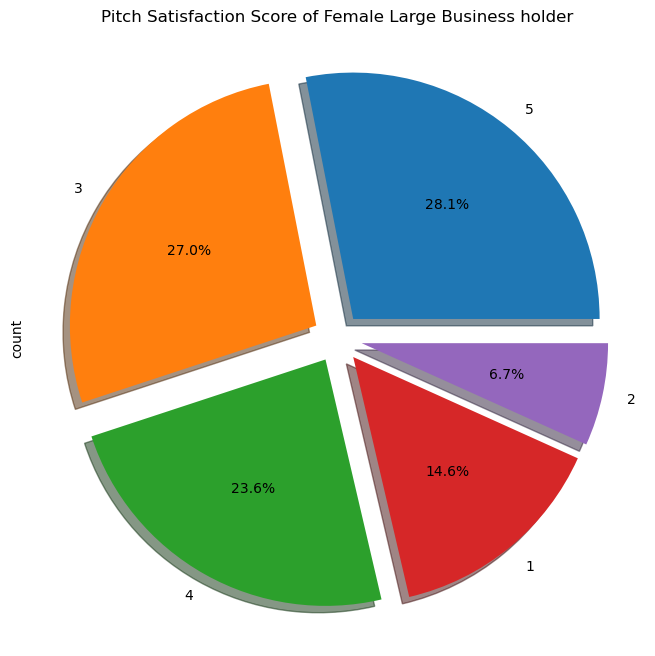

In [143]:
female_LargeBusiness_holder['PitchSatisfactionScore'].value_counts().plot.pie(
    x = female_LargeBusiness_holder['PitchSatisfactionScore'], autopct = '%1.1f%%', figsize = (8,8), 
    explode=[0.1,0.1,0.1,0.1,0.1], shadow=True)
plt.title("Pitch Satisfaction Score of Female Large Business holder")
plt.show()

In [123]:
# These are the large business female who gives 5 to the pitch statisfaction score

df[(df['PitchSatisfactionScore'] == 5) & (df['Occupation'] == 'Large Business') & (df['Gender'] == 'Female')]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
117,200117,0,36.0,Company Invited,3,17.0,Large Business,Female,3,3.0,Standard,3.0,Divorced,1.0,0,5,0,0.0,Senior Manager,24738.0
142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
145,200145,0,30.0,Self Enquiry,1,11.0,Large Business,Female,2,3.0,Basic,5.0,Married,6.0,0,5,1,1.0,Executive,18204.0
263,200263,0,46.0,Self Enquiry,3,8.0,Large Business,Female,3,5.0,Super Deluxe,4.0,Divorced,4.0,1,5,1,2.0,AVP,31872.0
357,200357,1,21.0,Company Invited,3,6.0,Large Business,Female,2,4.0,Basic,4.0,Single,2.0,1,5,1,1.0,Executive,17174.0
464,200464,0,37.0,Self Enquiry,1,6.0,Large Business,Female,2,3.0,Standard,3.0,Unmarried,5.0,0,5,1,1.0,Senior Manager,22491.0
494,200494,0,34.0,Self Enquiry,3,20.0,Large Business,Female,2,3.0,Basic,3.0,Married,2.0,1,5,1,1.0,Executive,17579.0
674,200674,0,58.0,Self Enquiry,1,11.0,Large Business,Female,2,4.0,Standard,4.0,Married,3.0,1,5,1,1.0,Senior Manager,25552.0
728,200728,0,54.0,Self Enquiry,1,23.0,Large Business,Female,2,3.0,Standard,3.0,Divorced,1.0,0,5,1,0.0,Senior Manager,25739.0
815,200815,0,21.0,Self Enquiry,1,6.0,Large Business,Female,3,4.0,Basic,4.0,Single,2.0,1,5,0,2.0,Executive,17070.0


In [124]:
female_LargeBusiness_holder['CityTier'].value_counts()

CityTier
1    118
3     56
2      4
Name: count, dtype: int64

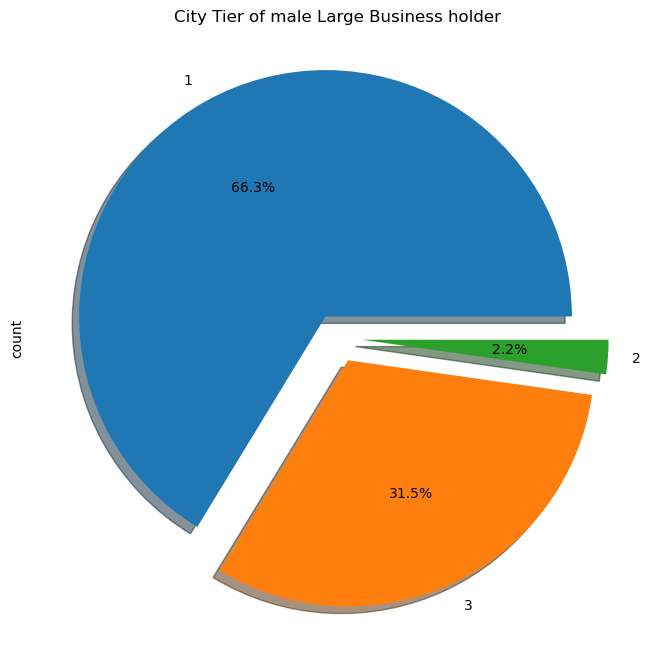

In [144]:
female_LargeBusiness_holder['CityTier'].value_counts().plot.pie(x = female_LargeBusiness_holder['CityTier'], 
                                                                autopct = '%1.1f%%', figsize = (8,8), 
                                                                explode=[0.1,0.1,0.1], shadow=True)
plt.title("City Tier of male Large Business holder")
plt.show()

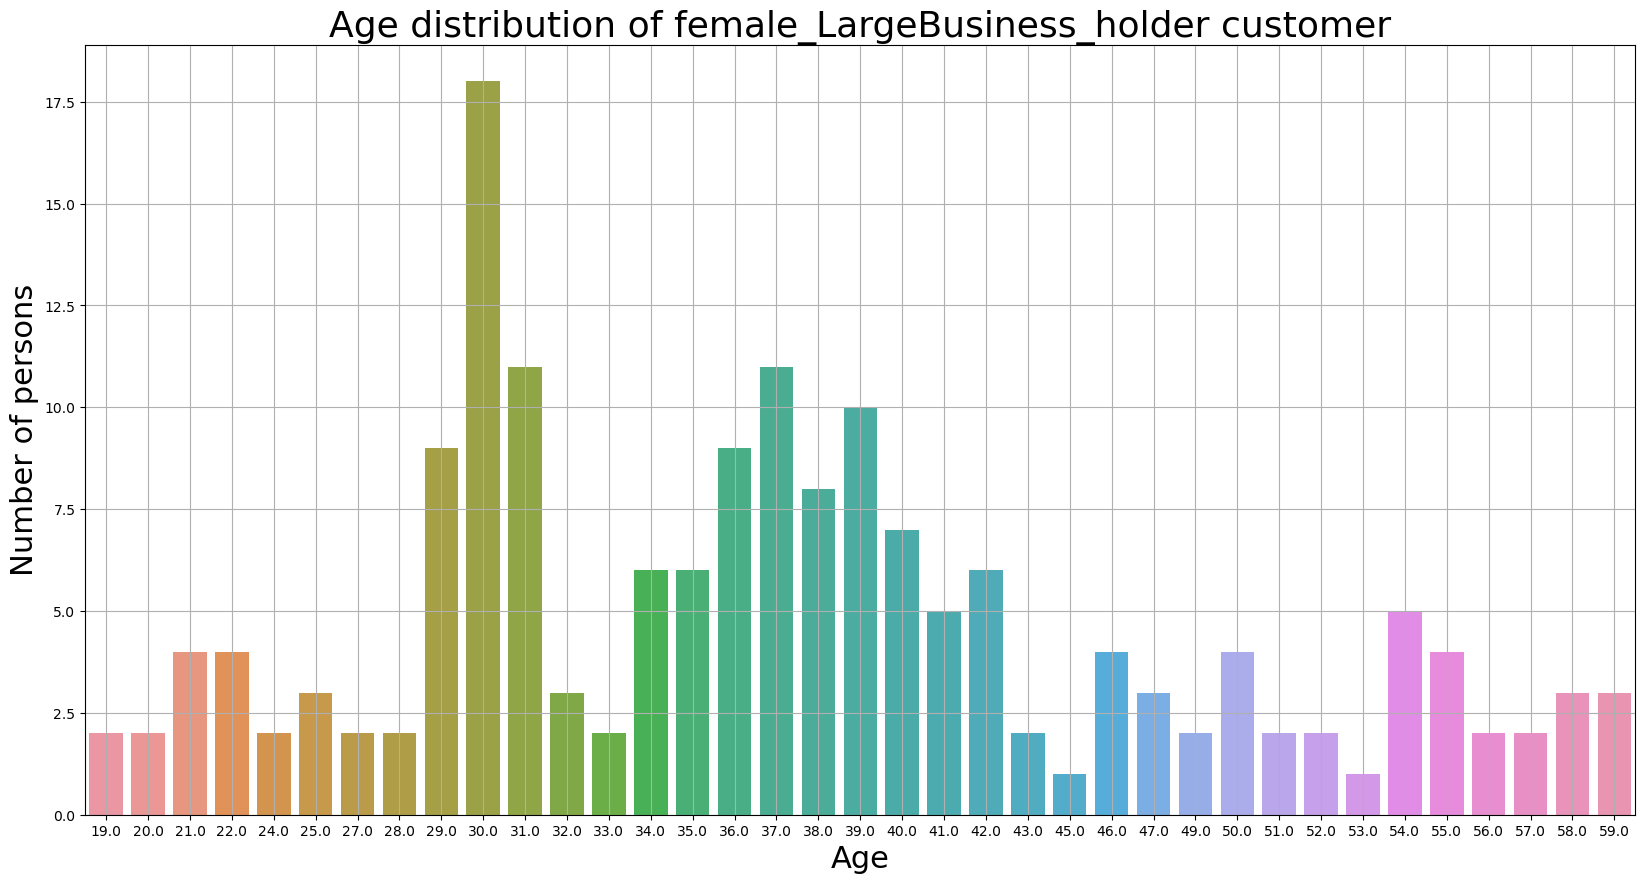

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(x=female_LargeBusiness_holder["Age"].value_counts().index, 
            y=female_LargeBusiness_holder["Age"].value_counts().values)
plt.title('Age distribution of female_LargeBusiness_holder customer', fontsize=26)
plt.xlabel('Age', fontsize=22)
plt.ylabel('Number of persons', fontsize=22)
plt.grid()
plt.show()

In [127]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

# Male Salaried Customer

In [128]:
male_Salary_holder = df[(df['Occupation'] == 'Salaried') & (df['Gender'] == 'Male')]
male_Salary_holder

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
12,200012,0,31.0,Self Enquiry,1,32.0,Salaried,Male,2,3.0,Basic,3.0,Married,2.0,0,3,0,1.0,Executive,17911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,204877,1,39.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,5.0,Married,6.0,0,3,0,3.0,Manager,25571.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0


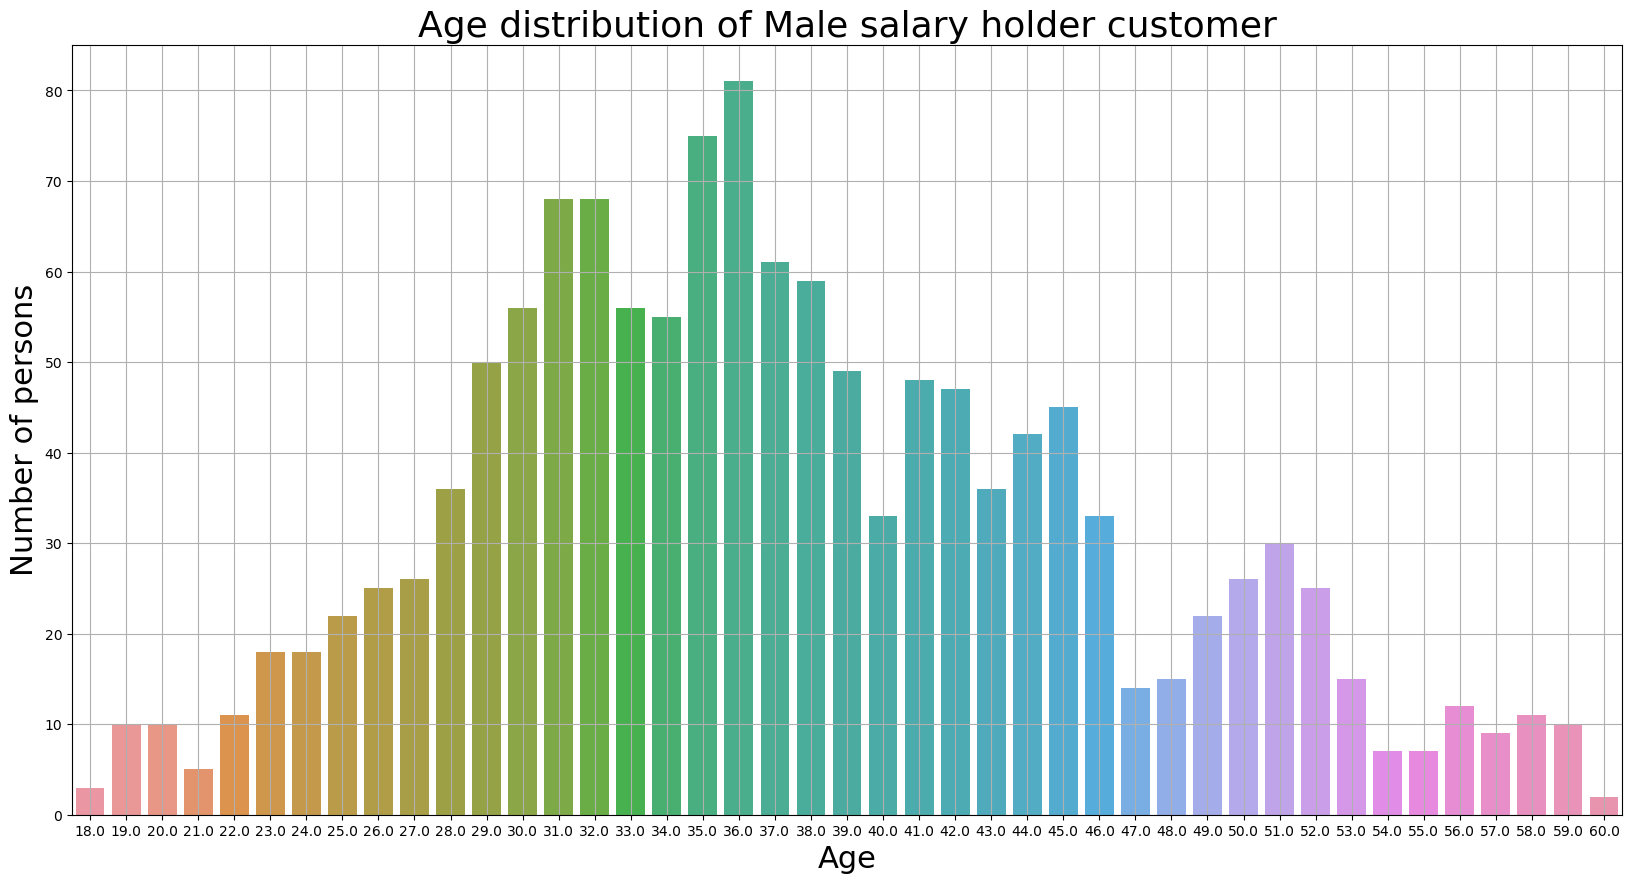

In [129]:
plt.figure(figsize=(20,10))
sns.barplot(x=male_Salary_holder["Age"].value_counts().index, 
            y=male_Salary_holder["Age"].value_counts().values)
plt.title('Age distribution of Male salary holder customer', fontsize=26)
plt.xlabel('Age', fontsize=22)
plt.ylabel('Number of persons', fontsize=22)
plt.grid()
plt.show()

In [130]:
male_Salary_holder['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       971
Company Invited    452
Name: count, dtype: int64

In [131]:
male_Salary_holder['CityTier'].value_counts()

CityTier
1    1024
3     316
2      86
Name: count, dtype: int64

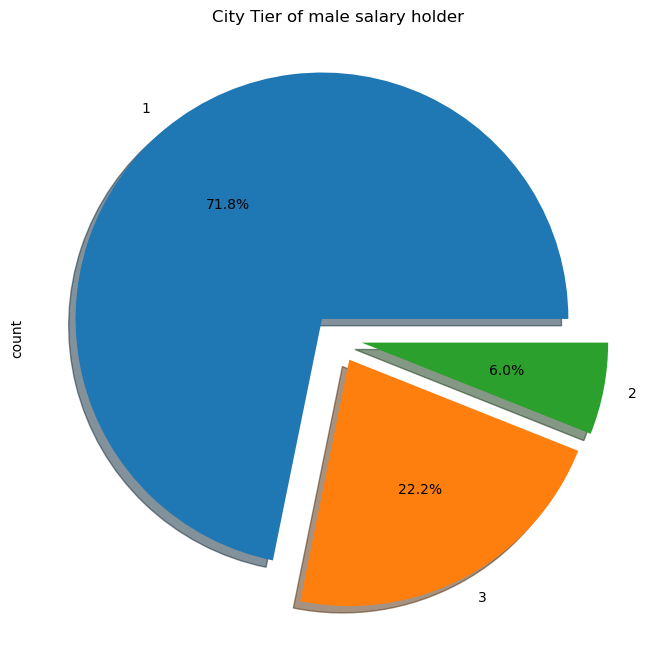

In [132]:
male_Salary_holder['CityTier'].value_counts().plot.pie(x = male_Salary_holder['CityTier'], autopct = '%1.1f%%', 
                                                             figsize = (8,8), explode=[0.1,0.1,0.1], shadow=True)
plt.title("City Tier of male salary holder")
plt.show()

In [133]:
male_Salary_holder['ProductPitched'].value_counts()

ProductPitched
Basic           574
Deluxe          484
Standard        198
Super Deluxe     90
King             80
Name: count, dtype: int64

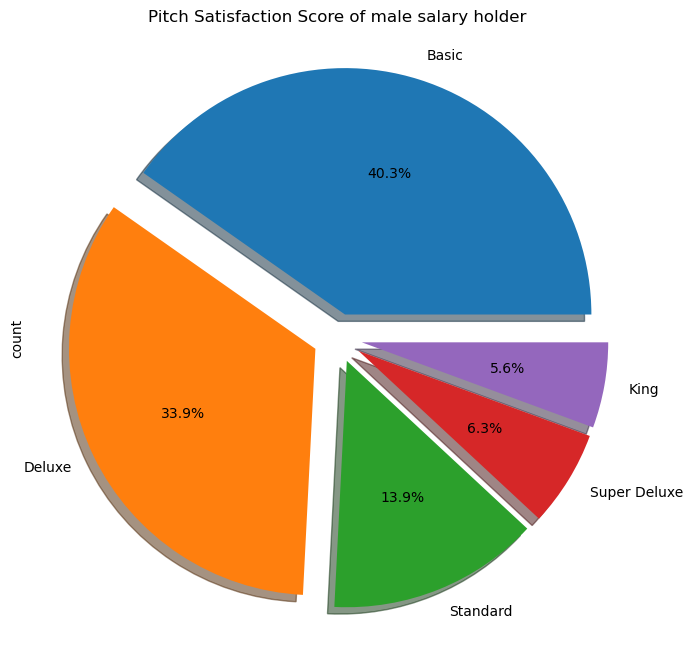

In [134]:
male_Salary_holder['ProductPitched'].value_counts().plot.pie(x = male_Salary_holder['ProductPitched'], autopct = '%1.1f%%', 
                                                             figsize = (8,8), explode=[0.1,0.1,0.1,0.1,0.1], shadow=True)
plt.title("Pitch Satisfaction Score of male salary holder")
plt.show()

# Female Salaried Customer

In [135]:
female_Salary_holder = df[(df['Occupation'] == 'Salaried') & (df['Gender'] == 'Female')]
female_Salary_holder

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
11,200011,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
15,200015,0,29.0,Self Enquiry,1,27.0,Salaried,Female,2,2.0,Standard,5.0,Married,2.0,0,5,1,1.0,Senior Manager,24980.0
18,200018,0,53.0,Self Enquiry,3,8.0,Salaried,Female,3,4.0,Super Deluxe,3.0,Divorced,3.0,0,3,1,0.0,AVP,30427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,204849,1,33.0,Company Invited,1,10.0,Salaried,Female,3,4.0,Basic,3.0,Unmarried,3.0,0,4,1,1.0,Executive,24887.0
4851,204851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,204868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0
4870,204870,1,57.0,Self Enquiry,3,23.0,Salaried,Female,4,4.0,Standard,NaN,Single,4.0,1,5,1,3.0,Senior Manager,38395.0


In [136]:
female_Salary_holder.shape

(942, 20)

In [137]:
female_Salary_holder["Age"].value_counts()

Age
34.0    50
35.0    45
36.0    45
33.0    45
32.0    36
37.0    36
30.0    36
38.0    35
39.0    33
27.0    33
43.0    31
42.0    29
41.0    29
29.0    29
40.0    28
31.0    27
28.0    24
26.0    23
45.0    21
44.0    20
46.0    19
25.0    17
48.0    16
55.0    16
47.0    15
50.0    15
54.0    15
60.0    13
53.0    13
56.0    13
59.0    12
21.0    11
51.0    11
49.0    11
24.0    10
52.0    10
22.0     8
57.0     8
20.0     5
23.0     4
19.0     2
61.0     2
18.0     1
58.0     1
Name: count, dtype: int64

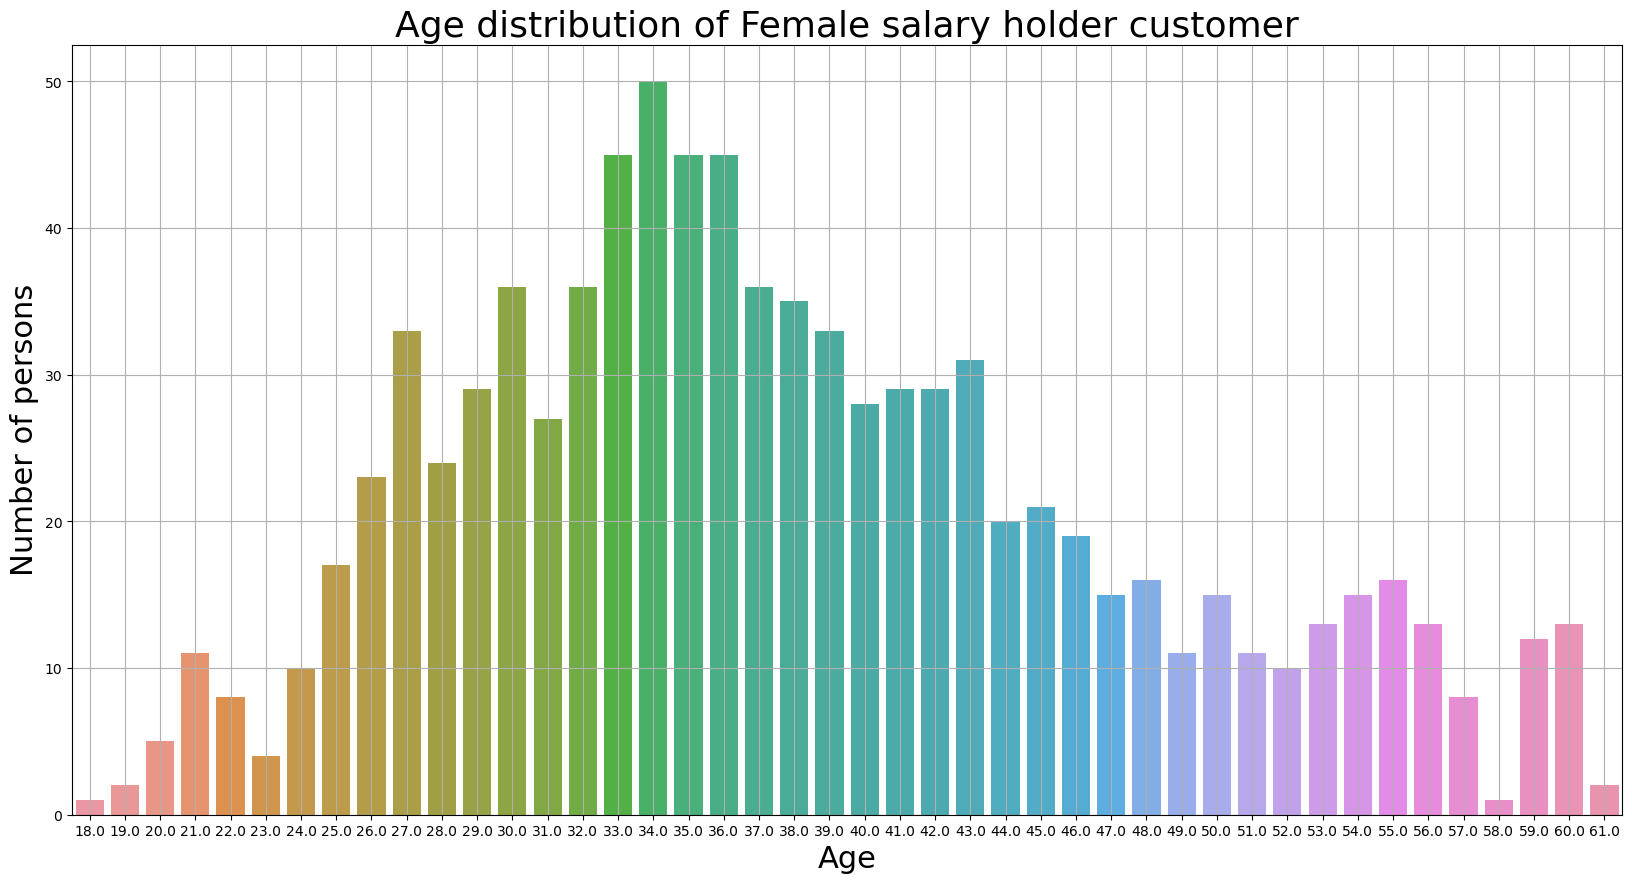

In [138]:
plt.figure(figsize=(20,10))
sns.barplot(x=female_Salary_holder["Age"].value_counts().index, 
            y=female_Salary_holder["Age"].value_counts().values)
plt.title('Age distribution of Female salary holder customer', fontsize=26)
plt.xlabel('Age', fontsize=22)
plt.ylabel('Number of persons', fontsize=22)
plt.grid()
plt.show()

In [139]:
female_Salary_holder['ProductPitched'].value_counts()

ProductPitched
Basic           350
Deluxe          334
Standard        140
Super Deluxe     84
King             34
Name: count, dtype: int64

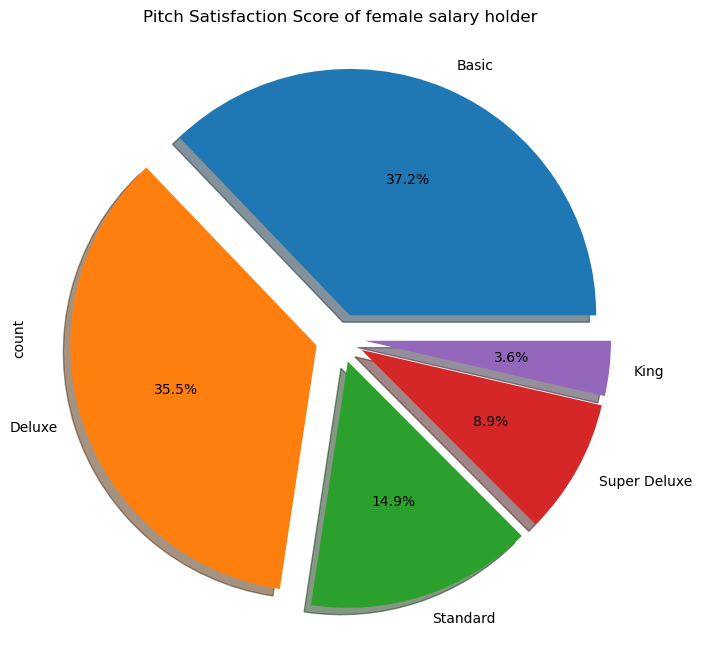

In [140]:
female_Salary_holder['ProductPitched'].value_counts().plot.pie(x = female_Salary_holder['ProductPitched'], autopct = '%1.1f%%', 
                                                             figsize = (8,8), explode=[0.1,0.1,0.1,0.1,0.1], shadow=True)
plt.title("Pitch Satisfaction Score of female salary holder")
plt.show()

In [141]:
female_Salary_holder['TypeofContact'].value_counts(normalize=True)

TypeofContact
Self Enquiry       0.708511
Company Invited    0.291489
Name: proportion, dtype: float64